In [1]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取训练集和测试集文件
train_data = pd.read_csv('用户新增预测挑战赛公开数据/train.csv')
test_data = pd.read_csv('用户新增预测挑战赛公开数据/test.csv')

#快速查看数据结构
print(train_data.head(),end = '\n\n')
print(train_data.info())

#测试集包含620356个实例，字段x1至x8为用户相关的属性，为匿名处理字段
#其中部分列的值可能是重复的，意味着它可能是一个分类属性

   uuid  eid                          udmap      common_ts  x1  x2  x3   x4  \
0     0   26  {"key3":"67804","key2":"650"}  1689673468244   4   0  41  107   
1     1   26  {"key3":"67804","key2":"484"}  1689082941469   4   0  41   24   
2     2    8                        unknown  1689407393040   4   0  41   71   
3     3   11                        unknown  1689467815688   1   3  41   17   
4     4   26  {"key3":"67804","key2":"650"}  1689491751442   0   3  41   92   

    x5  x6  x7  x8  target  
0  206   1   0   1       0  
1  283   4   8   1       0  
2  288   4   7   1       0  
3  366   1   6   1       0  
4  383   4   8   1       0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620356 entries, 0 to 620355
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uuid       620356 non-null  int64 
 1   eid        620356 non-null  int64 
 2   udmap      620356 non-null  object
 3   common_ts  620356 non-null  int64 

In [2]:
#查看字段x1至x8有多少种分类存在
print(train_data['x1'].value_counts(),end='\n\n')
print(train_data['x2'].value_counts(),end='\n\n')
print(train_data['x3'].value_counts(),end='\n\n')
print(train_data['x4'].value_counts(),end='\n\n')
print(train_data['x5'].value_counts(),end='\n\n')
print(train_data['x6'].value_counts(),end='\n\n')
print(train_data['x7'].value_counts(),end='\n\n')
print(train_data['x8'].value_counts(),end='\n\n')

#从结果可以看出x1，x2，x6，x7，x8为分类数据

x1
4    381218
0    124004
1     95663
2     19047
3       424
Name: count, dtype: int64

x2
0    272402
1    135320
3    125743
2     86891
Name: count, dtype: int64

x3
41    617853
47       545
15       279
7        260
71       147
       ...  
63         1
69         1
72         1
6          1
13         1
Name: count, Length: 72, dtype: int64

x4
104    86344
85     43346
10     39200
144    38854
71     37282
       ...  
138        1
122        1
40         1
7          1
15         1
Name: count, Length: 138, dtype: int64

x5
288    37282
37     35509
305    31802
343    29444
241    24588
       ...  
409        1
275        1
26         1
31         1
73         1
Name: count, Length: 408, dtype: int64

x6
4    392989
1    226935
3       356
2        58
0        18
Name: count, dtype: int64

x7
7    185272
6    130071
2     89667
8     77262
9     74197
0     39042
4     16282
3      6417
5      2134
1        12
Name: count, dtype: int64

x8
1    530689
0     89667
Name: co

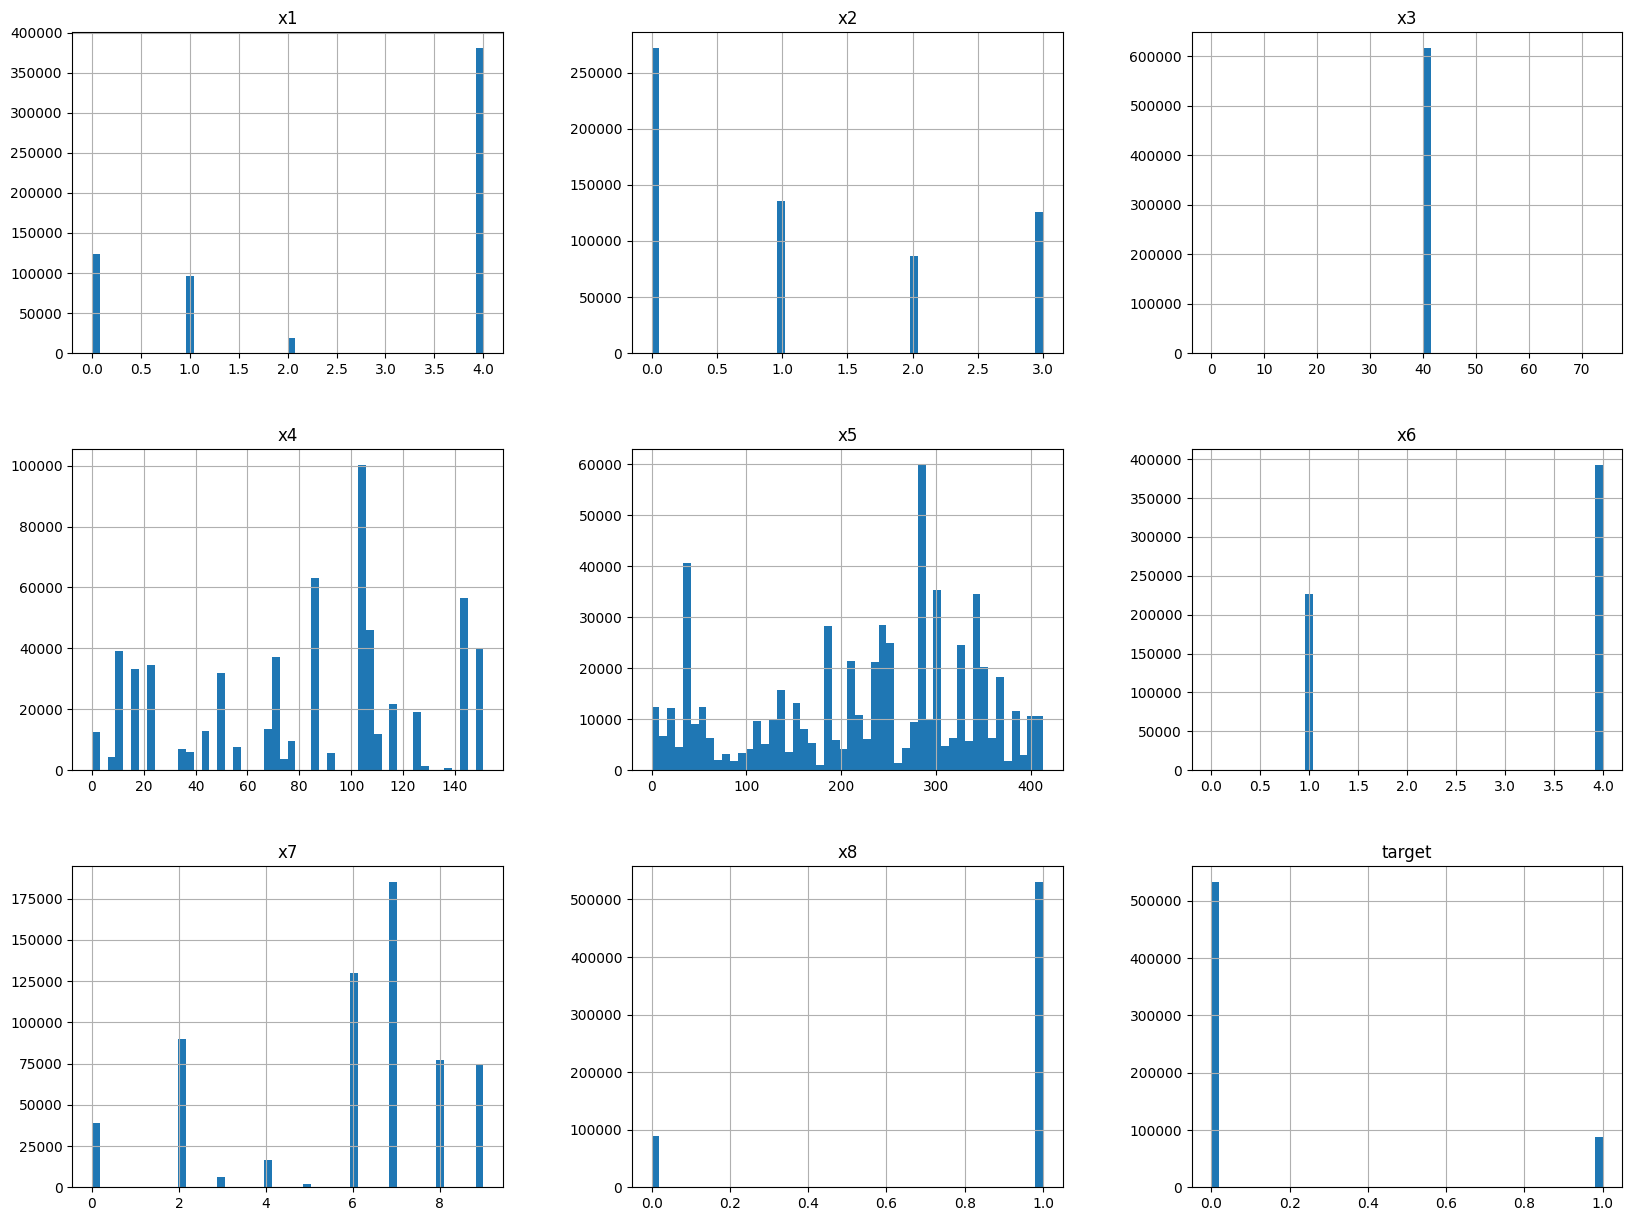

In [3]:
import matplotlib.pyplot as plt
train_data.iloc[:,4:].hist(bins=50,figsize=(20,15))
plt.show()
#图可以更清楚地看出分类数据，且target不均匀

<Axes: >

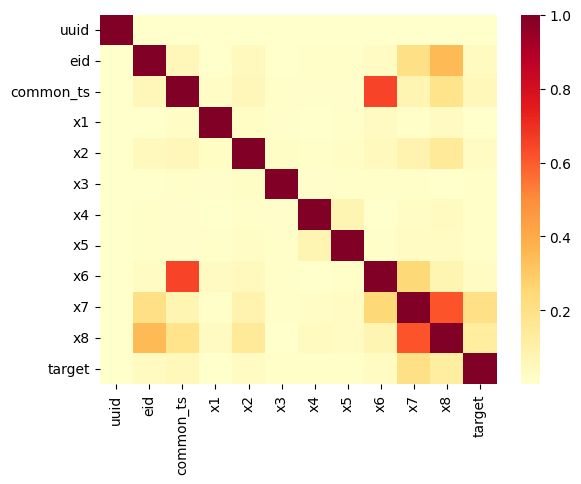

In [4]:
pic_train_data = pd.concat([train_data.iloc[:,0:2],train_data.iloc[:,3:]],axis=1)
sns.heatmap(pic_train_data.corr().abs(), cmap='YlOrRd')

In [5]:
corr_matrix = pic_train_data.corr()
corr_matrix['target'].sort_values(ascending=False)

target       1.000000
eid          0.035941
x2           0.027476
x5           0.011677
x1           0.002941
uuid        -0.000009
x3          -0.008969
x4          -0.010642
x6          -0.028725
common_ts   -0.053144
x8          -0.127709
x7          -0.199992
Name: target, dtype: float64

array([[<Axes: xlabel='x1', ylabel='x1'>,
        <Axes: xlabel='x2', ylabel='x1'>,
        <Axes: xlabel='x3', ylabel='x1'>,
        <Axes: xlabel='x4', ylabel='x1'>,
        <Axes: xlabel='x5', ylabel='x1'>,
        <Axes: xlabel='x6', ylabel='x1'>,
        <Axes: xlabel='x7', ylabel='x1'>,
        <Axes: xlabel='x8', ylabel='x1'>,
        <Axes: xlabel='target', ylabel='x1'>],
       [<Axes: xlabel='x1', ylabel='x2'>,
        <Axes: xlabel='x2', ylabel='x2'>,
        <Axes: xlabel='x3', ylabel='x2'>,
        <Axes: xlabel='x4', ylabel='x2'>,
        <Axes: xlabel='x5', ylabel='x2'>,
        <Axes: xlabel='x6', ylabel='x2'>,
        <Axes: xlabel='x7', ylabel='x2'>,
        <Axes: xlabel='x8', ylabel='x2'>,
        <Axes: xlabel='target', ylabel='x2'>],
       [<Axes: xlabel='x1', ylabel='x3'>,
        <Axes: xlabel='x2', ylabel='x3'>,
        <Axes: xlabel='x3', ylabel='x3'>,
        <Axes: xlabel='x4', ylabel='x3'>,
        <Axes: xlabel='x5', ylabel='x3'>,
        <Axes: xlabel='x

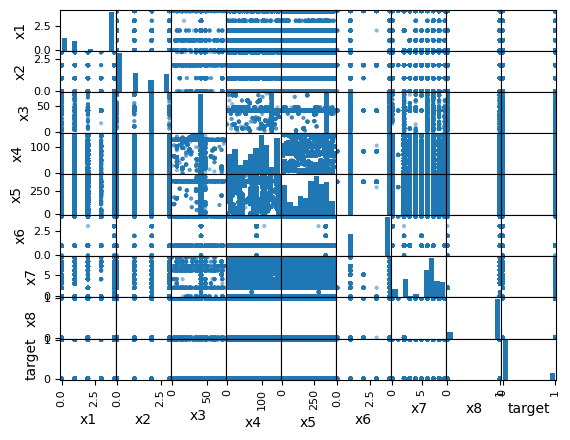

In [8]:
from pandas.plotting import scatter_matrix
attributes = ['x1','x2','x3','x4','x5','x6','x7','x8','target']
scatter_matrix(pic_train_data[attributes])

D:\Anaconda\envs\Datawhale\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


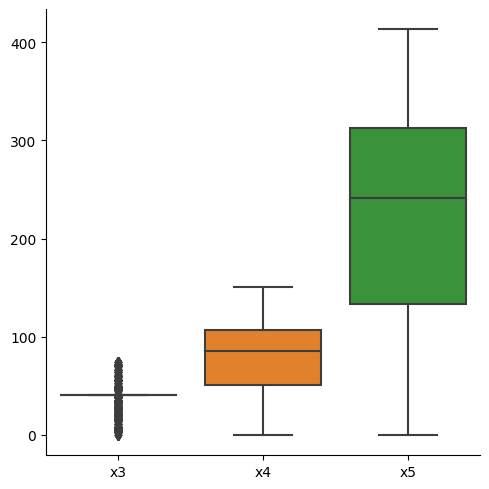

In [29]:
sns.catplot(kind='box',data=train_data.iloc[:,6:9]) #x3分布极其不均

In [34]:
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit='ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'], unit='ms')

# 使用 dt.hour 属性从 datetime 列中提取小时信息，并将提取的小时信息存储在新的列 'common_ts_hour'
train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour
#访问时间对于是否为新增用户有关吗？（待）

<Axes: >

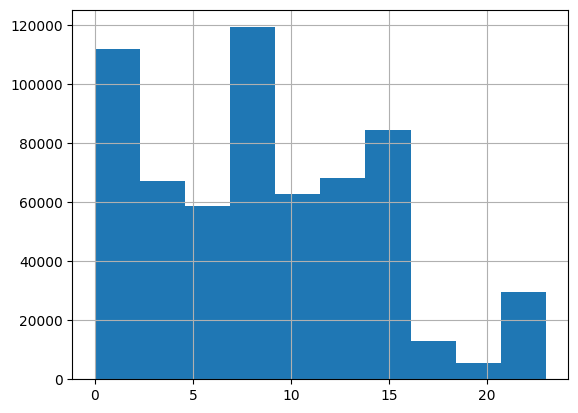

In [38]:
train_data['common_ts_hour'].hist()

In [39]:
train_data

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,target,common_ts_hour
0,0,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-18 09:44:28.244,4,0,41,107,206,1,0,1,0,9
1,1,26,"{""key3"":""67804"",""key2"":""484""}",2023-07-11 13:42:21.469,4,0,41,24,283,4,8,1,0,13
2,2,8,unknown,2023-07-15 07:49:53.040,4,0,41,71,288,4,7,1,0,7
3,3,11,unknown,2023-07-16 00:36:55.688,1,3,41,17,366,1,6,1,0,0
4,4,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-16 07:15:51.442,0,3,41,92,383,4,8,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620351,620351,2,"{""key4"":""14"",""key5"":""14""}",2023-07-10 12:07:30.527,4,0,41,104,37,4,4,1,0,12
620352,620352,8,unknown,2023-07-16 06:51:42.305,4,0,41,104,37,1,6,1,0,6
620353,620353,41,"{""key1"":""274"",""key2"":""446""}",2023-07-09 08:41:18.584,0,2,41,104,37,4,2,0,1,8
620354,620354,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-18 04:02:40.171,4,0,41,17,366,1,6,1,0,4


In [44]:
train_data.iloc[:,-2:].corr()#好像关系并不大，但是否为时间具有连续性造成的疑问？

,target,common_ts_hour
target,1.000000,-0.006896
common_ts_hour,-0.006896,1.000000


-----------------------0----------------------------


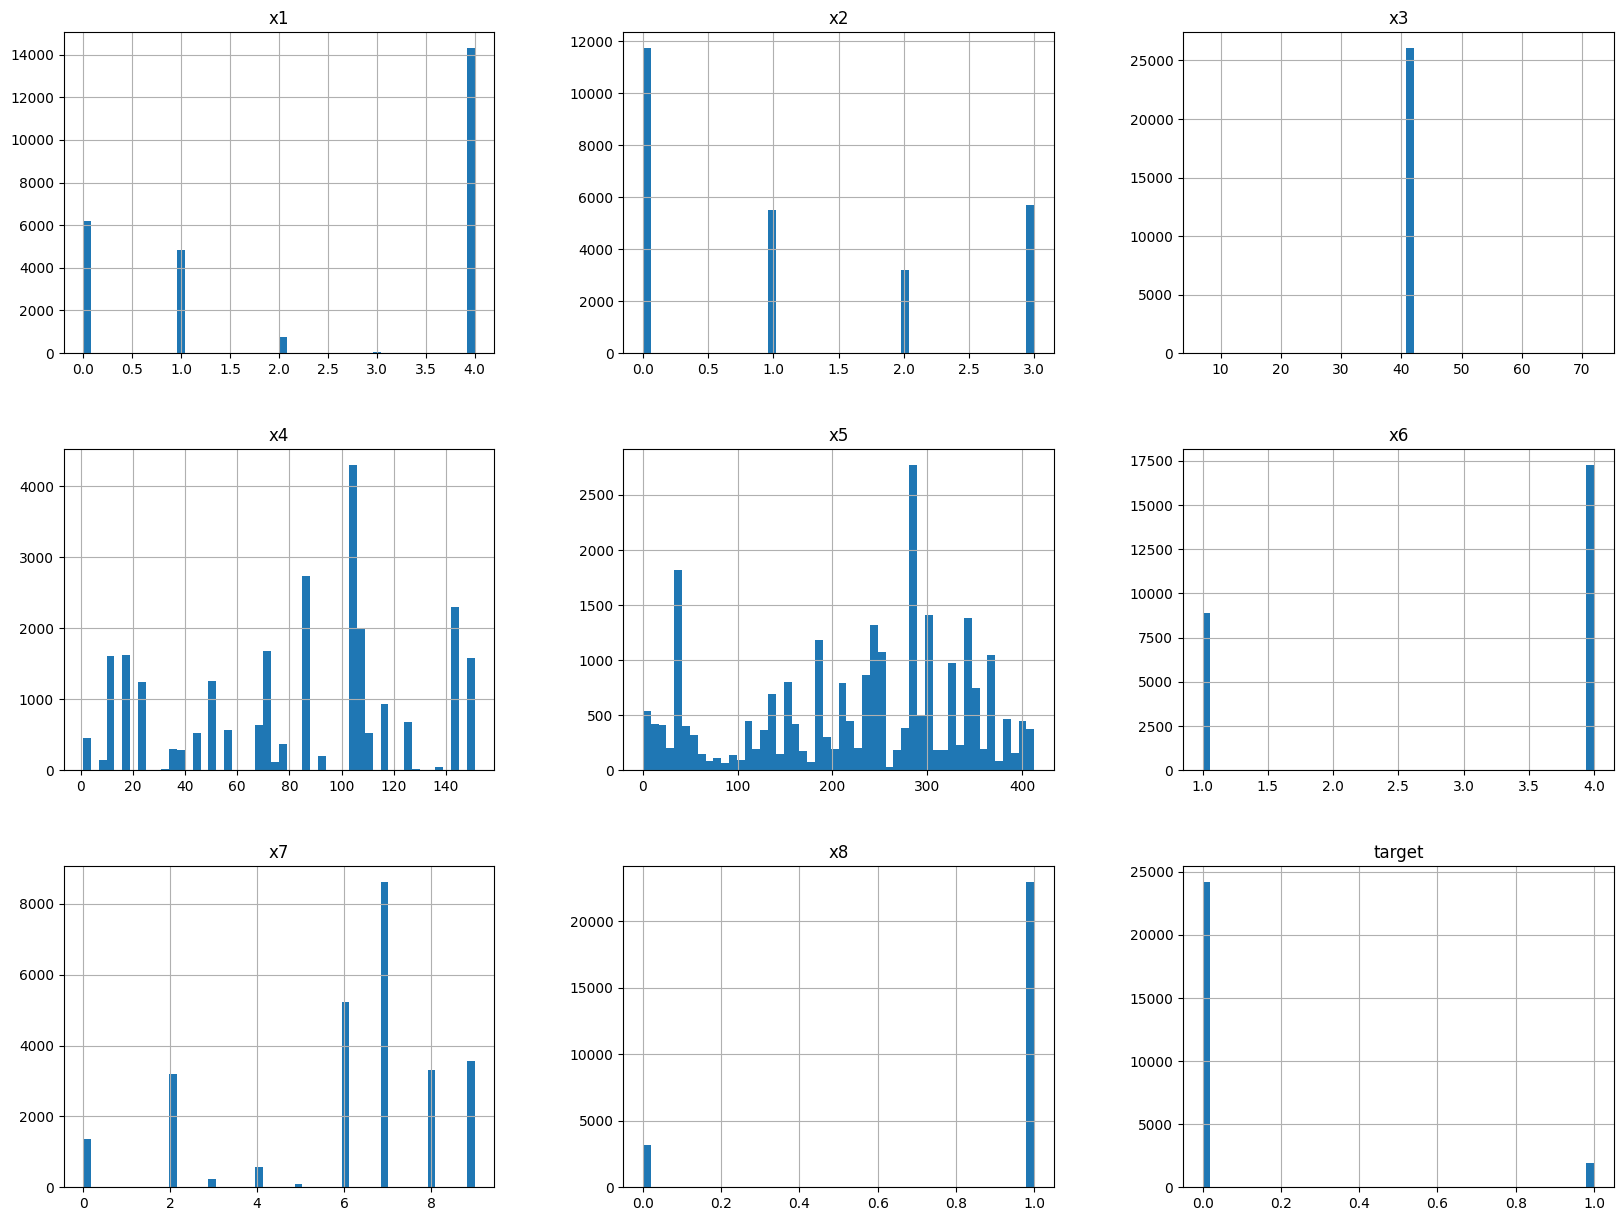

-----------------------1----------------------------


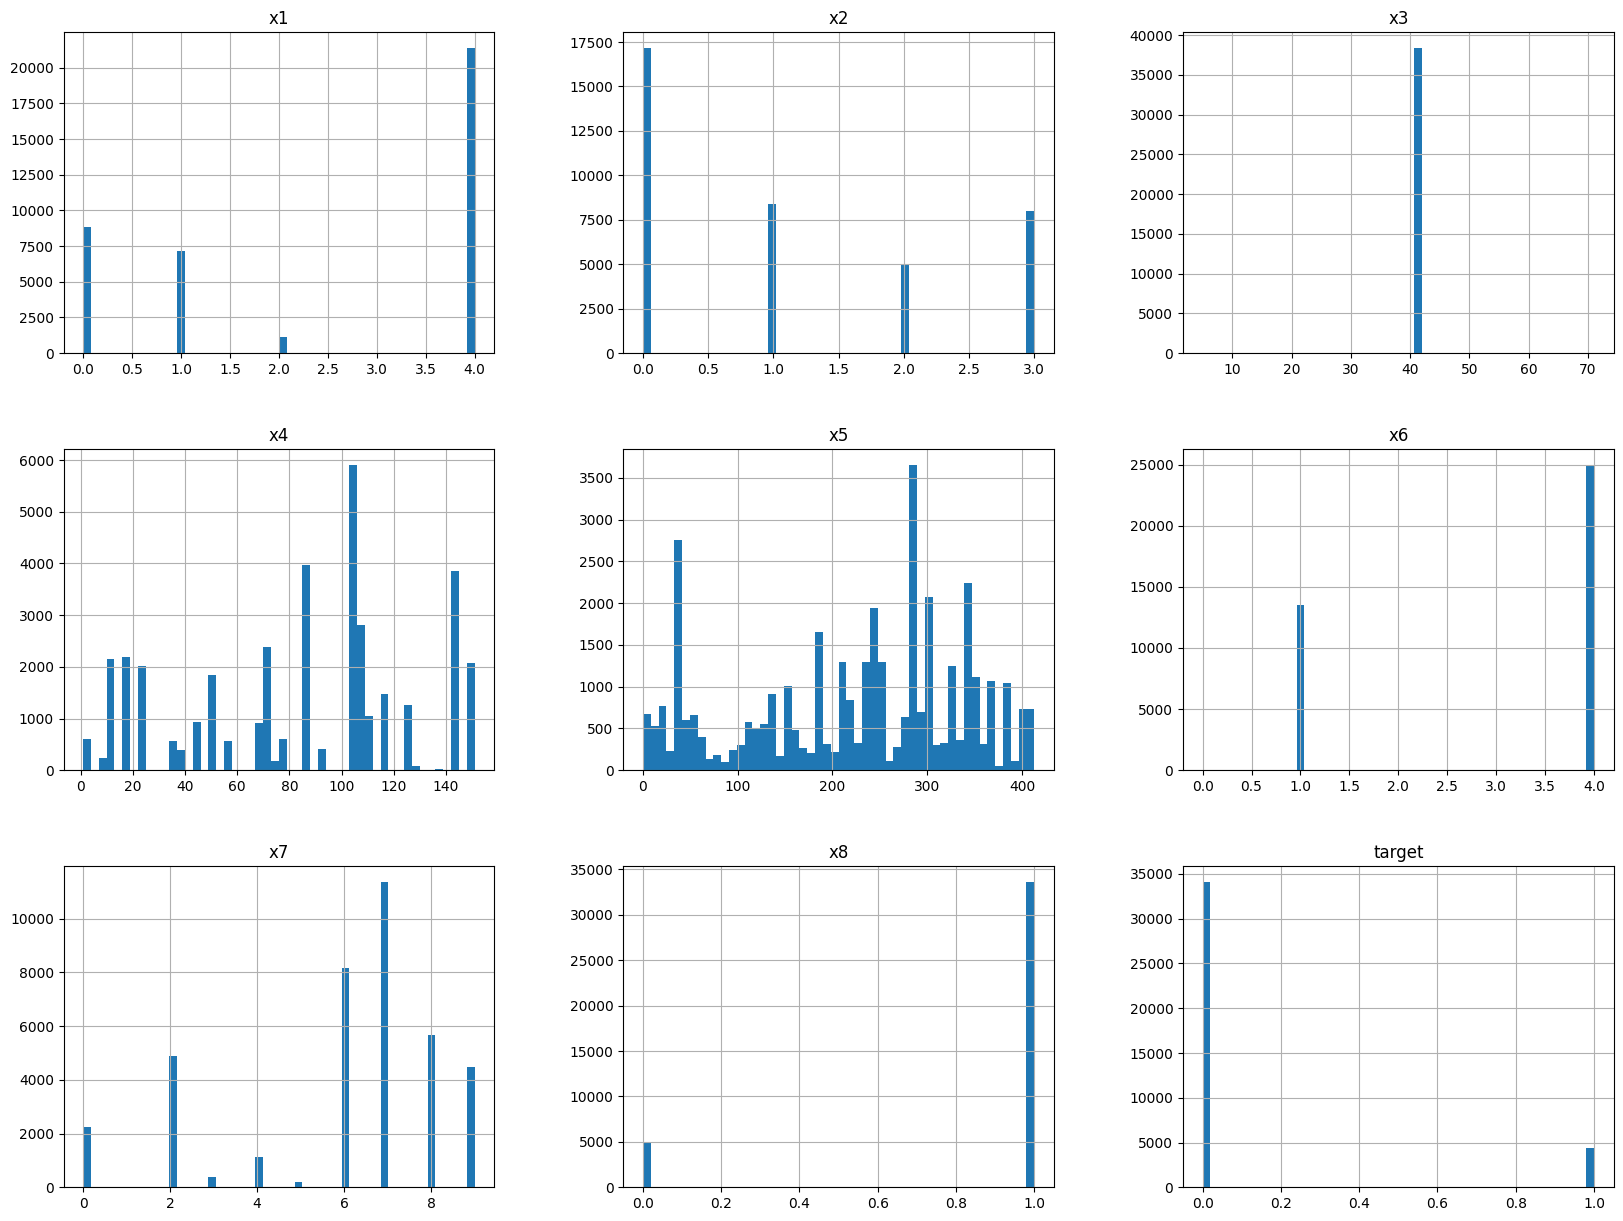

-----------------------2----------------------------


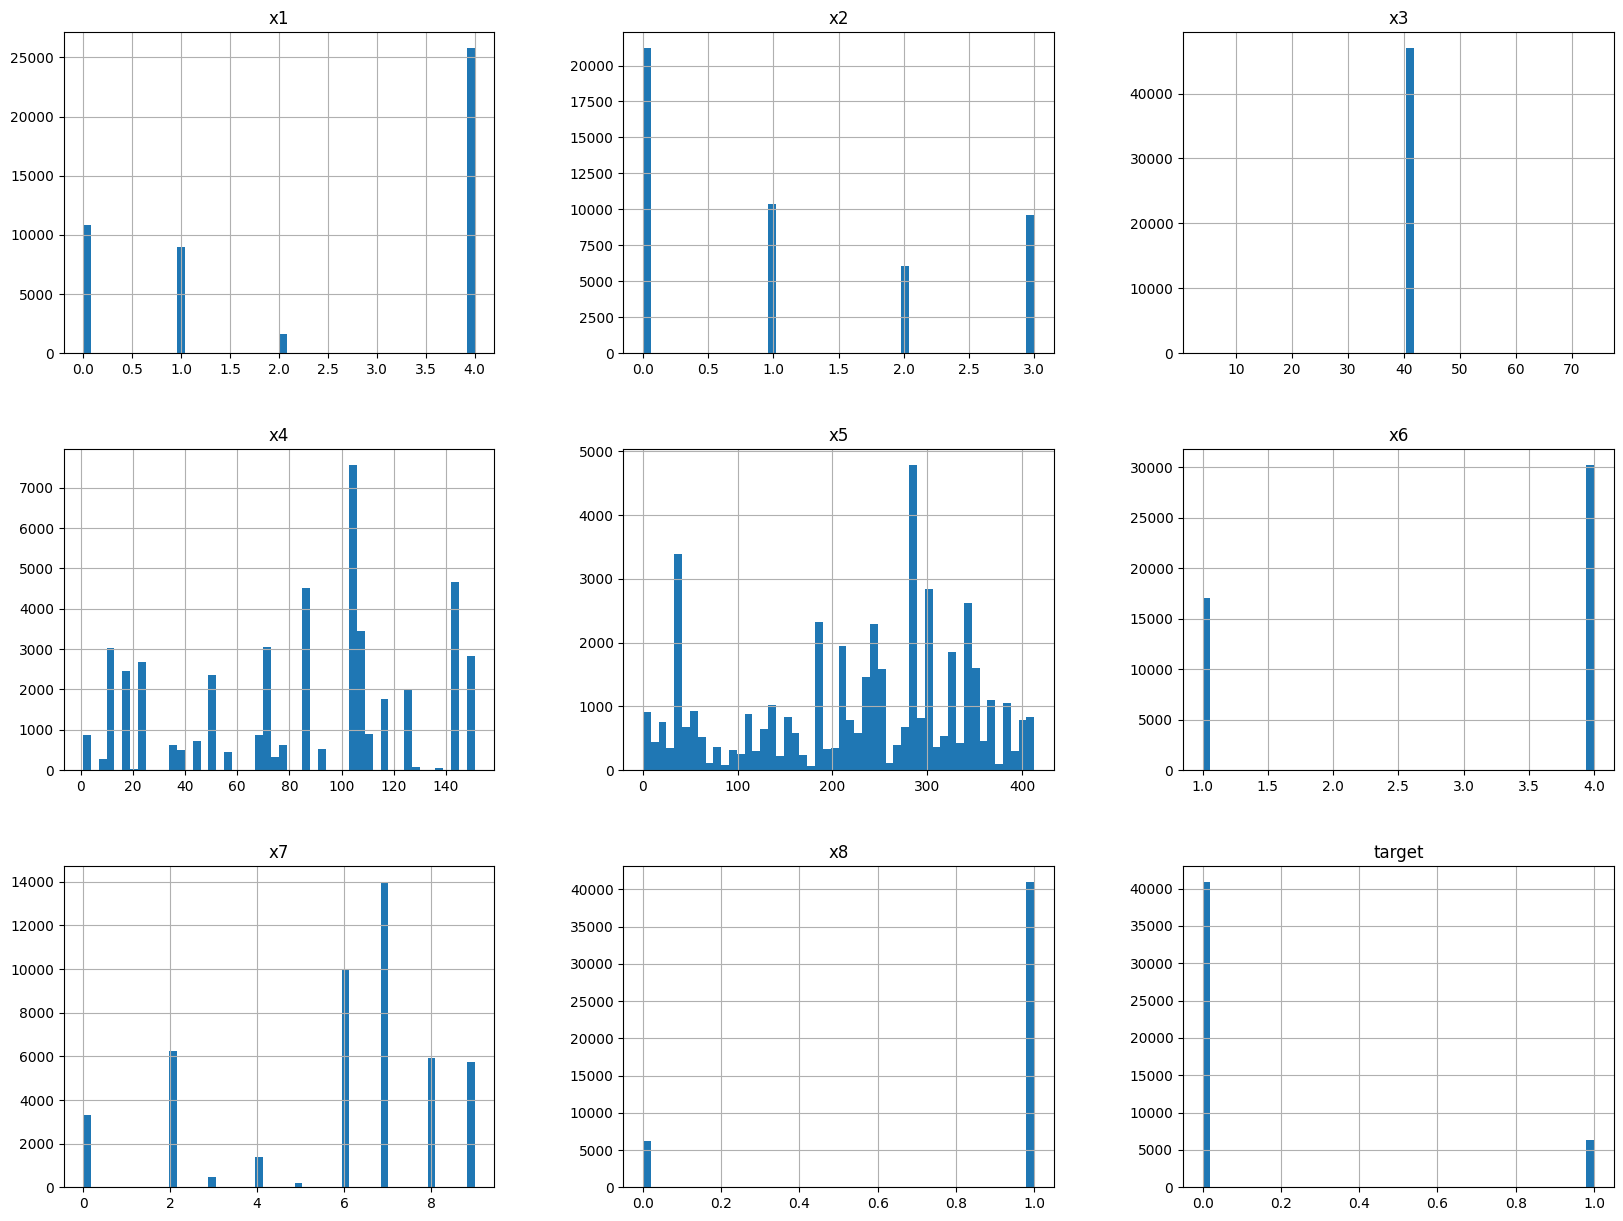

-----------------------3----------------------------


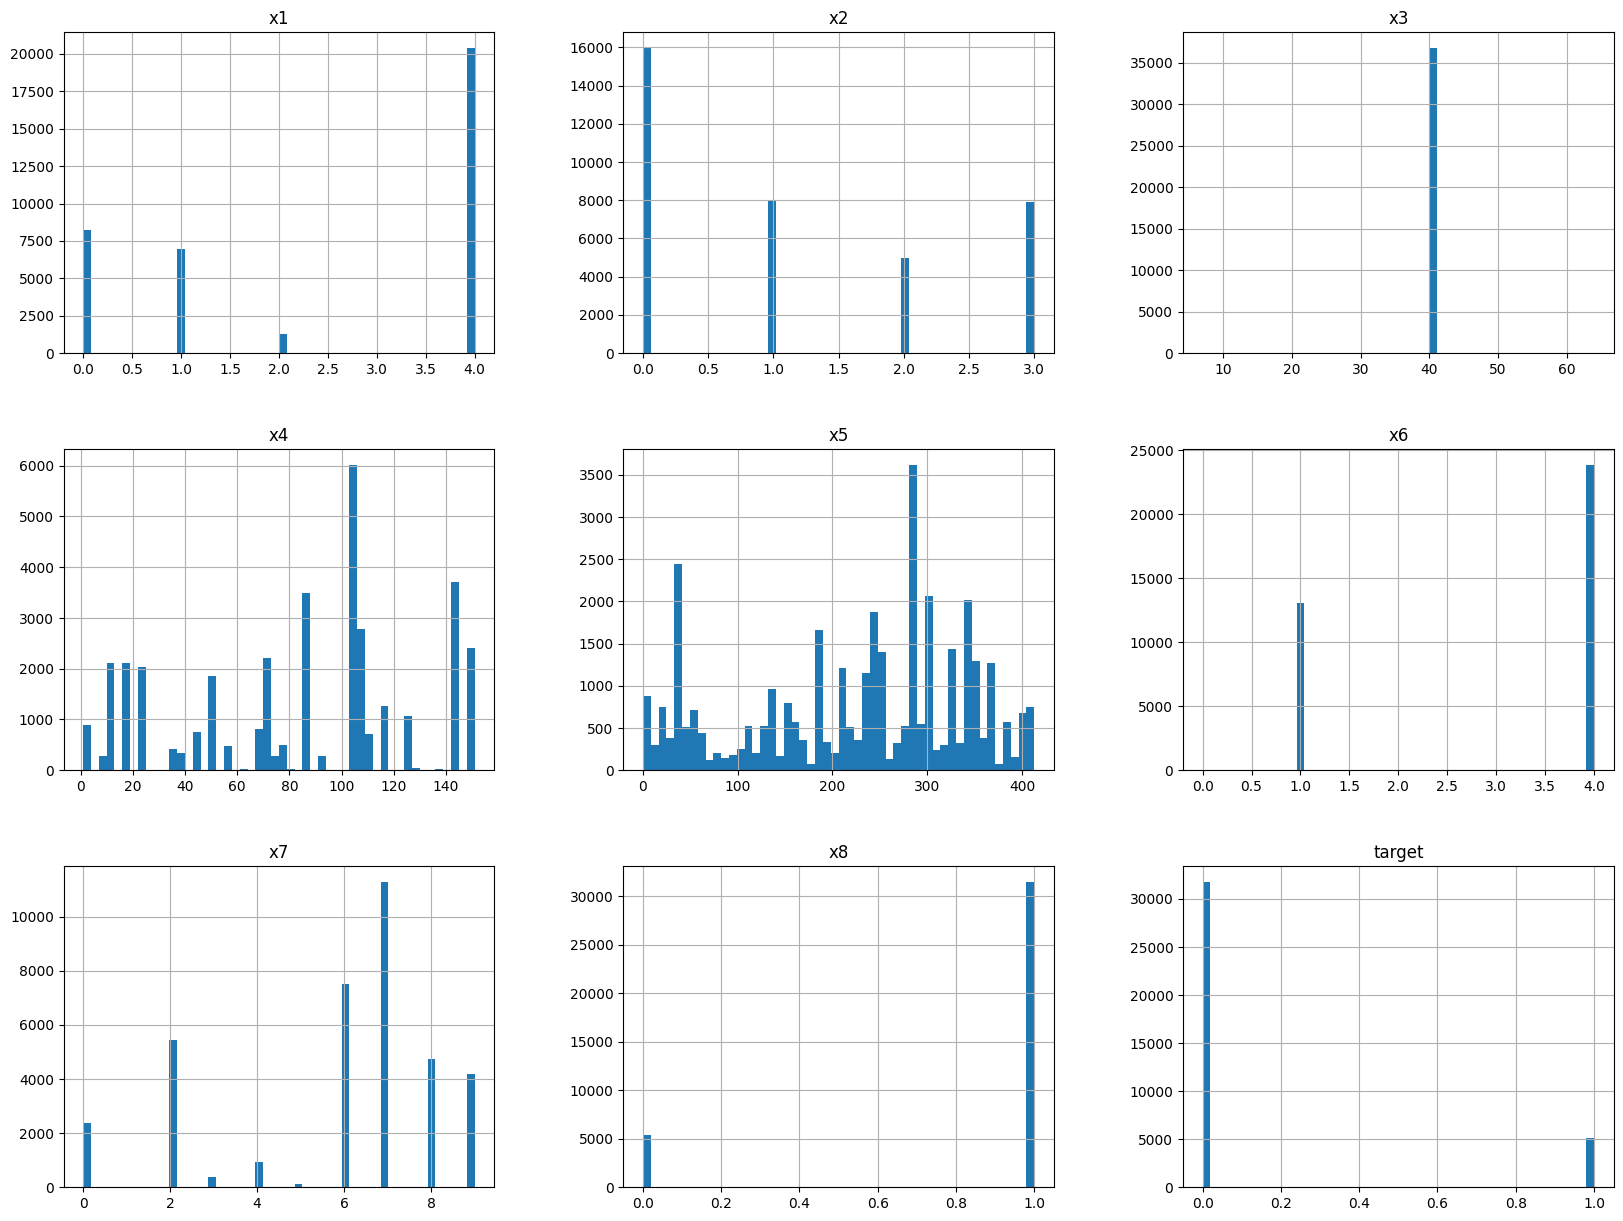

-----------------------4----------------------------


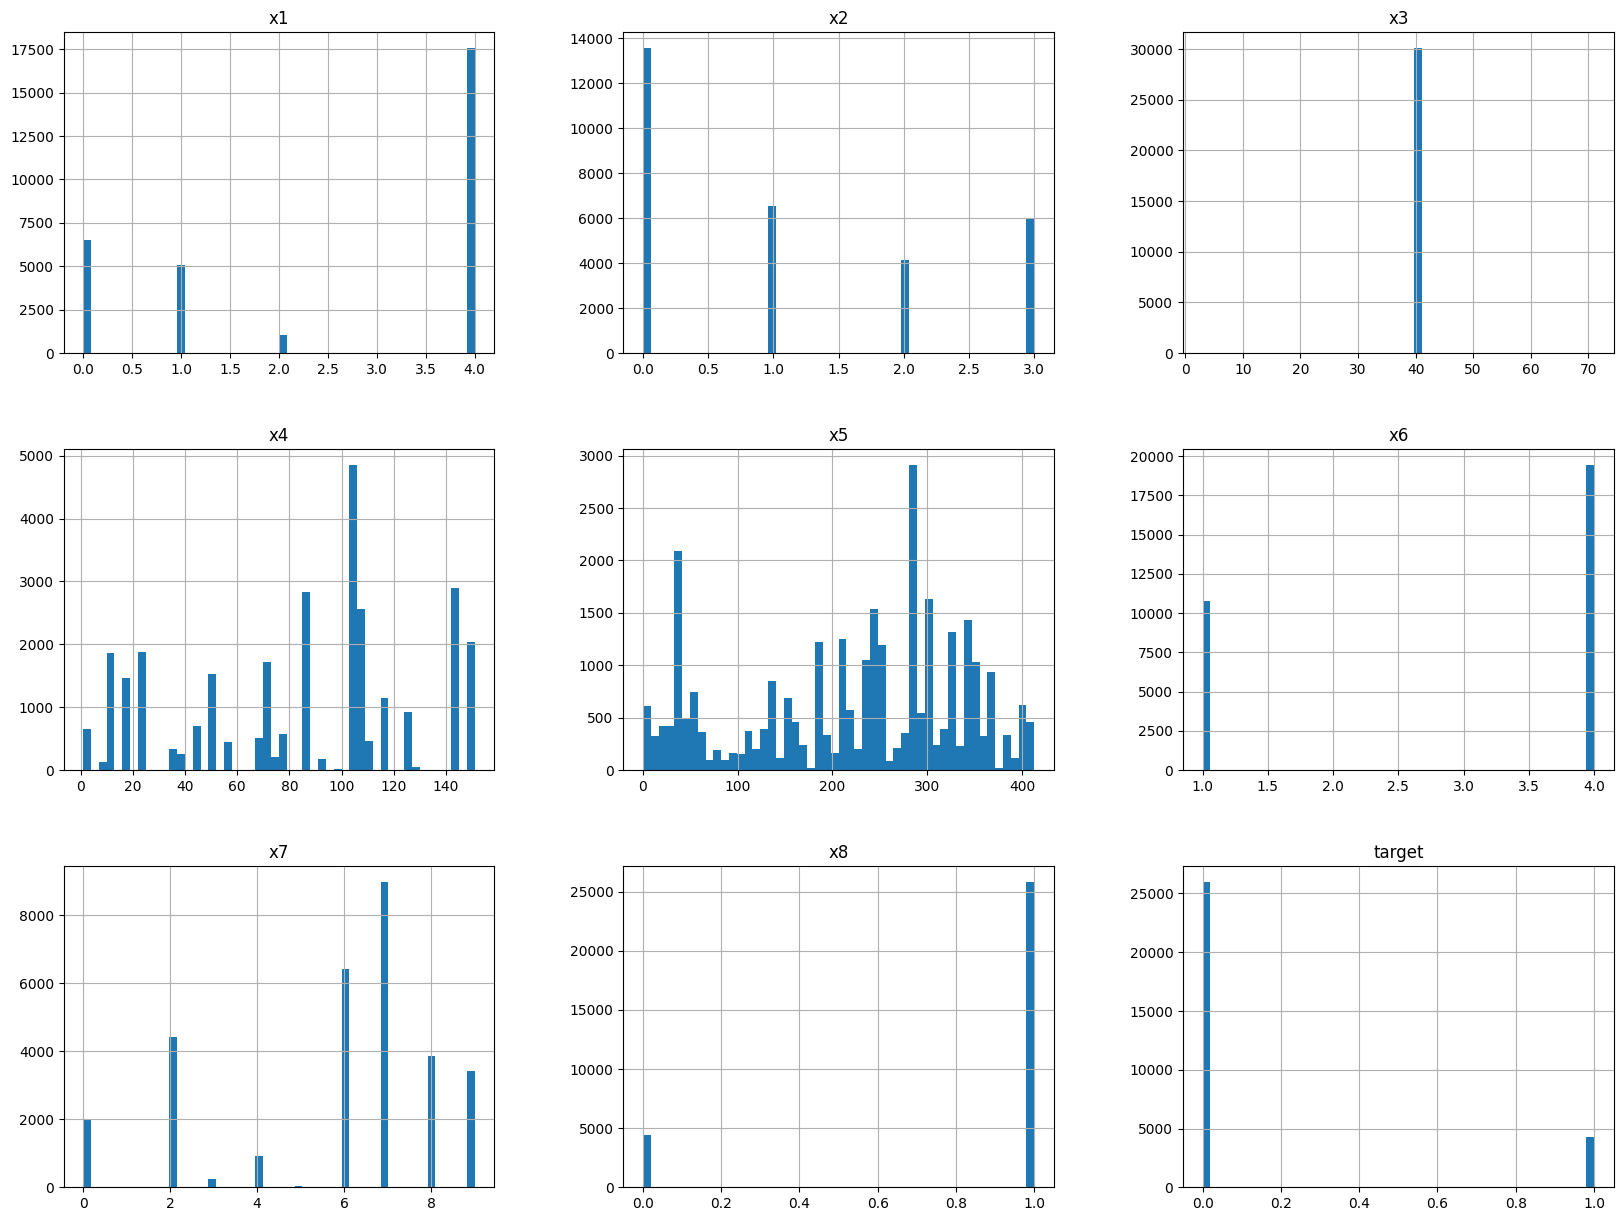

-----------------------5----------------------------


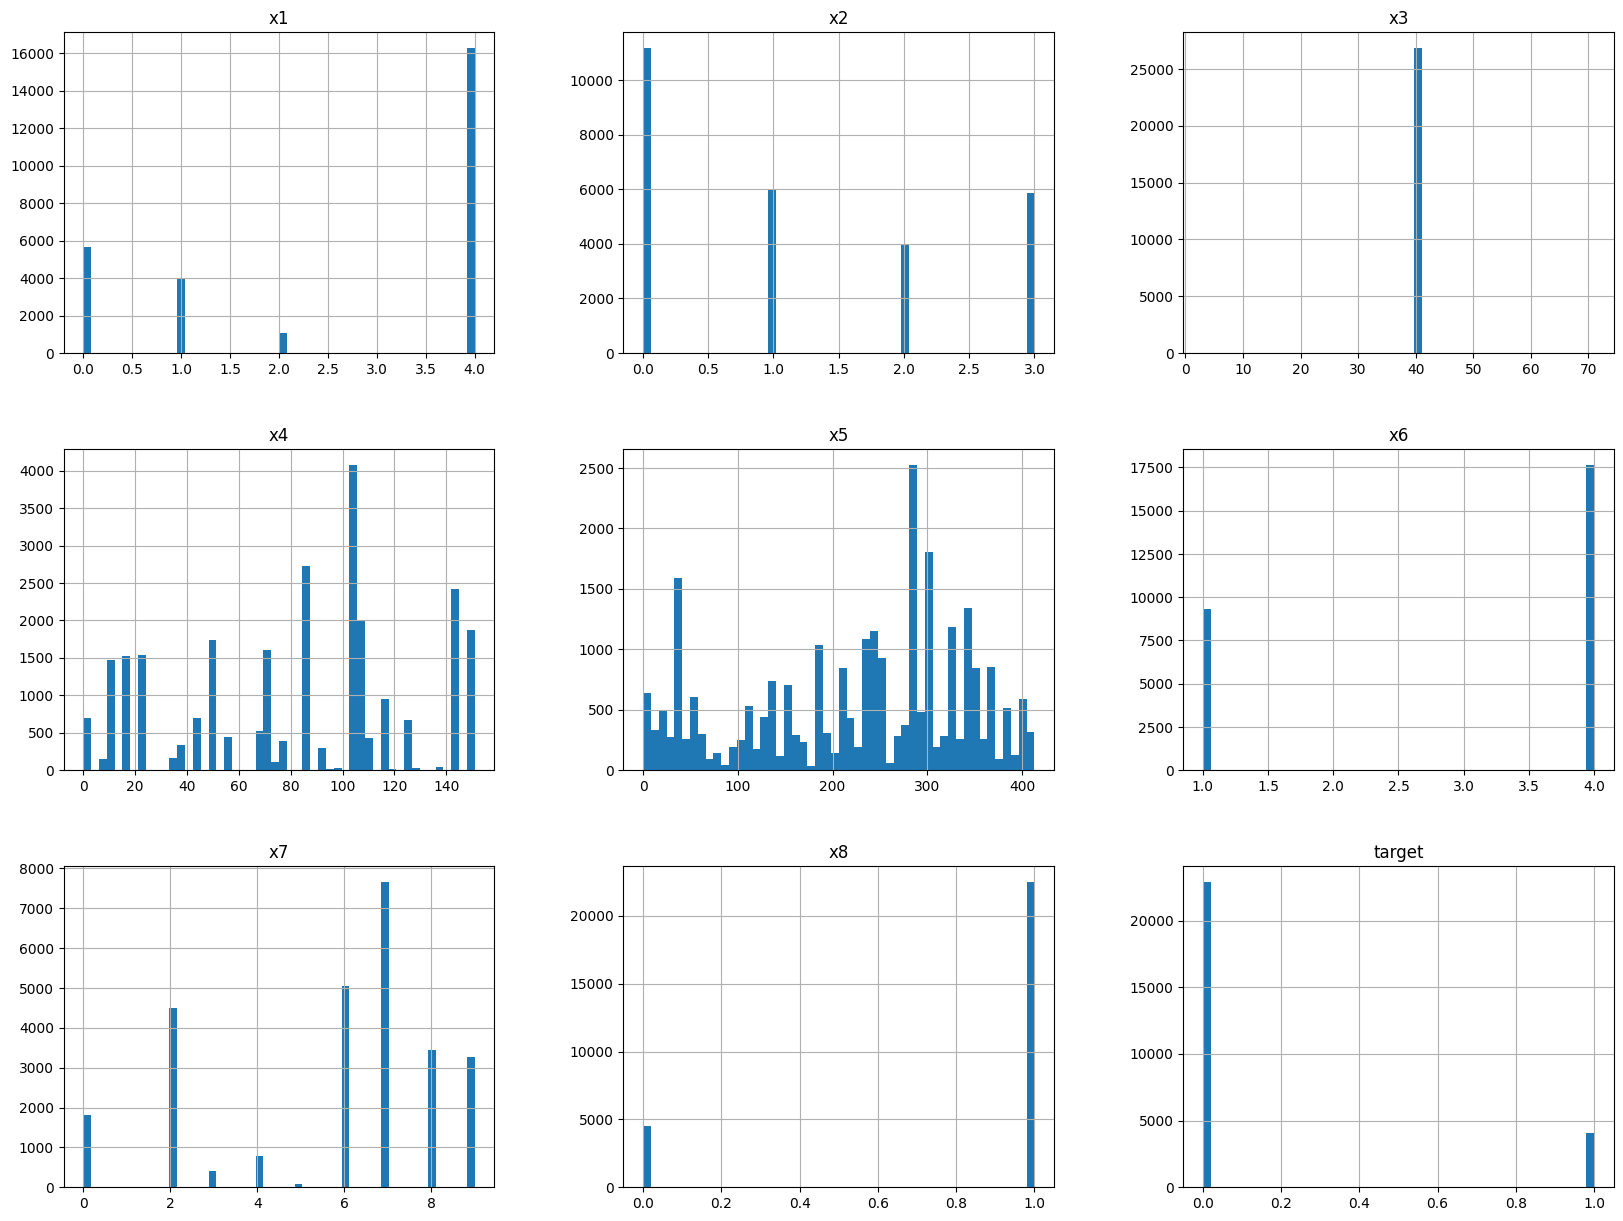

-----------------------6----------------------------


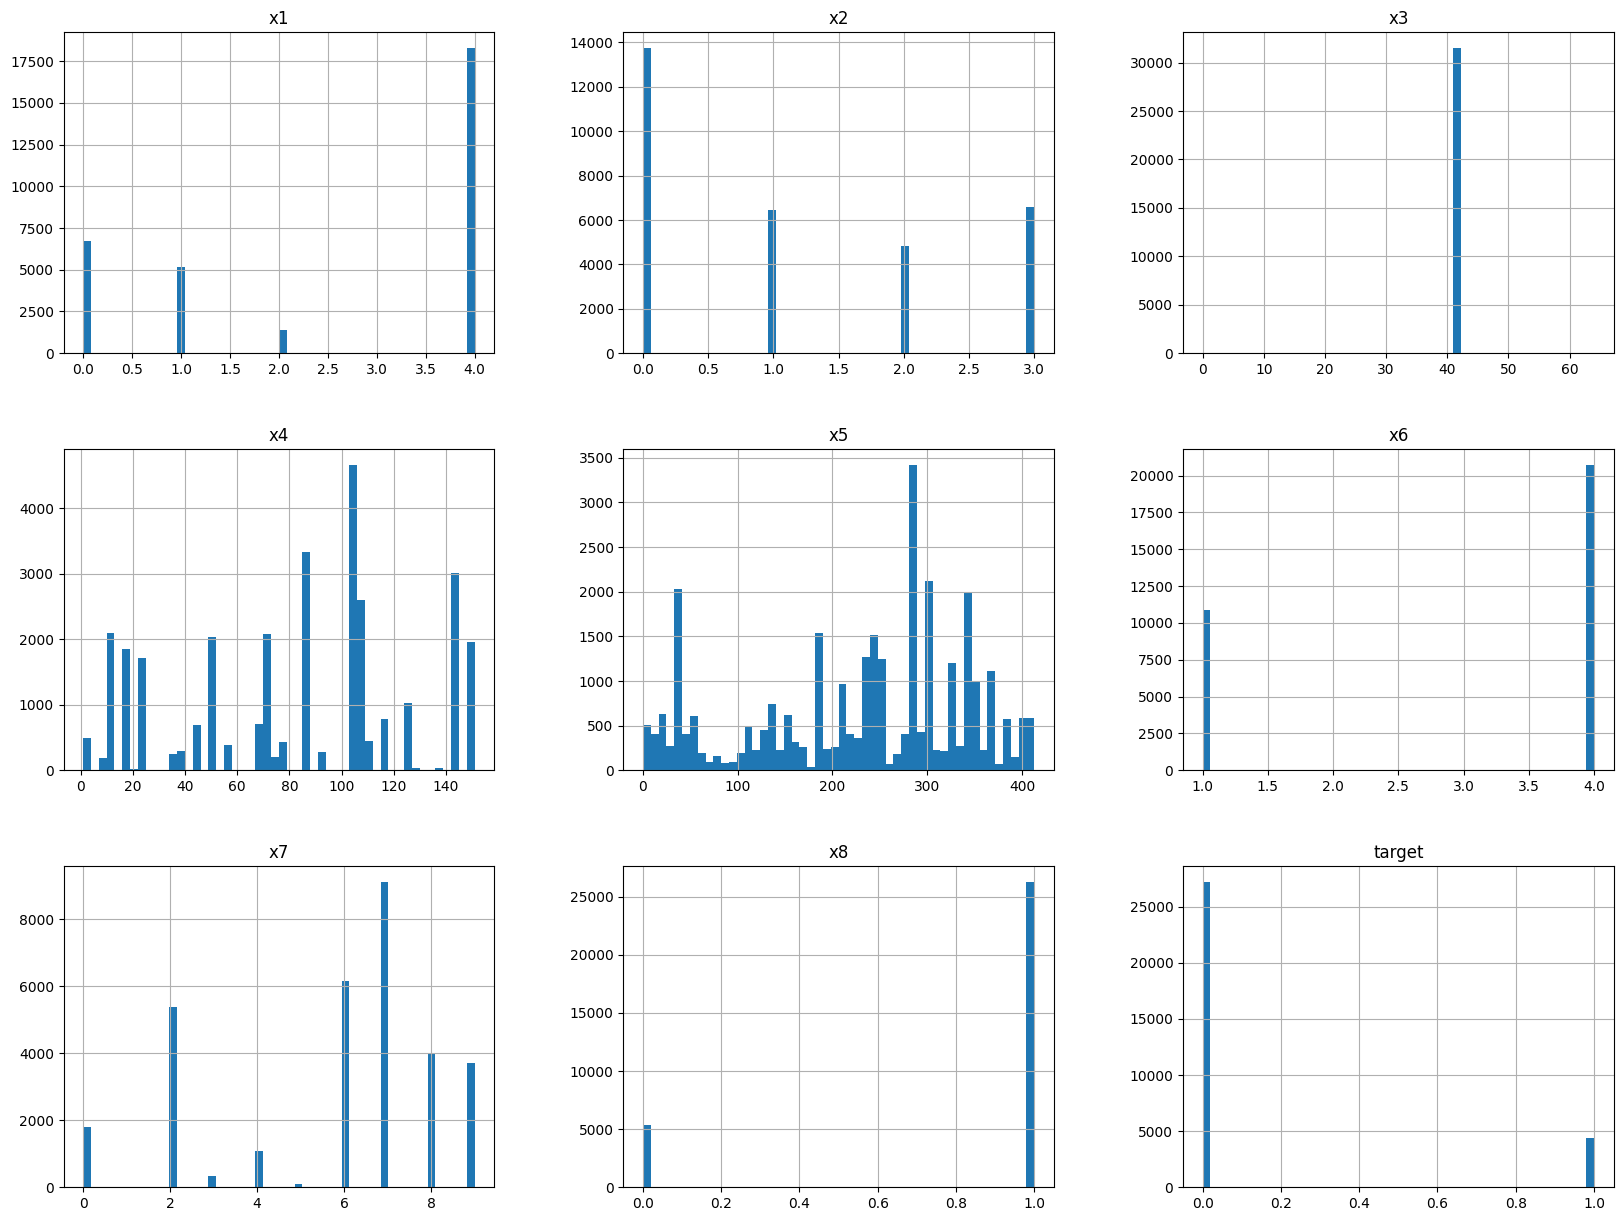

-----------------------7----------------------------


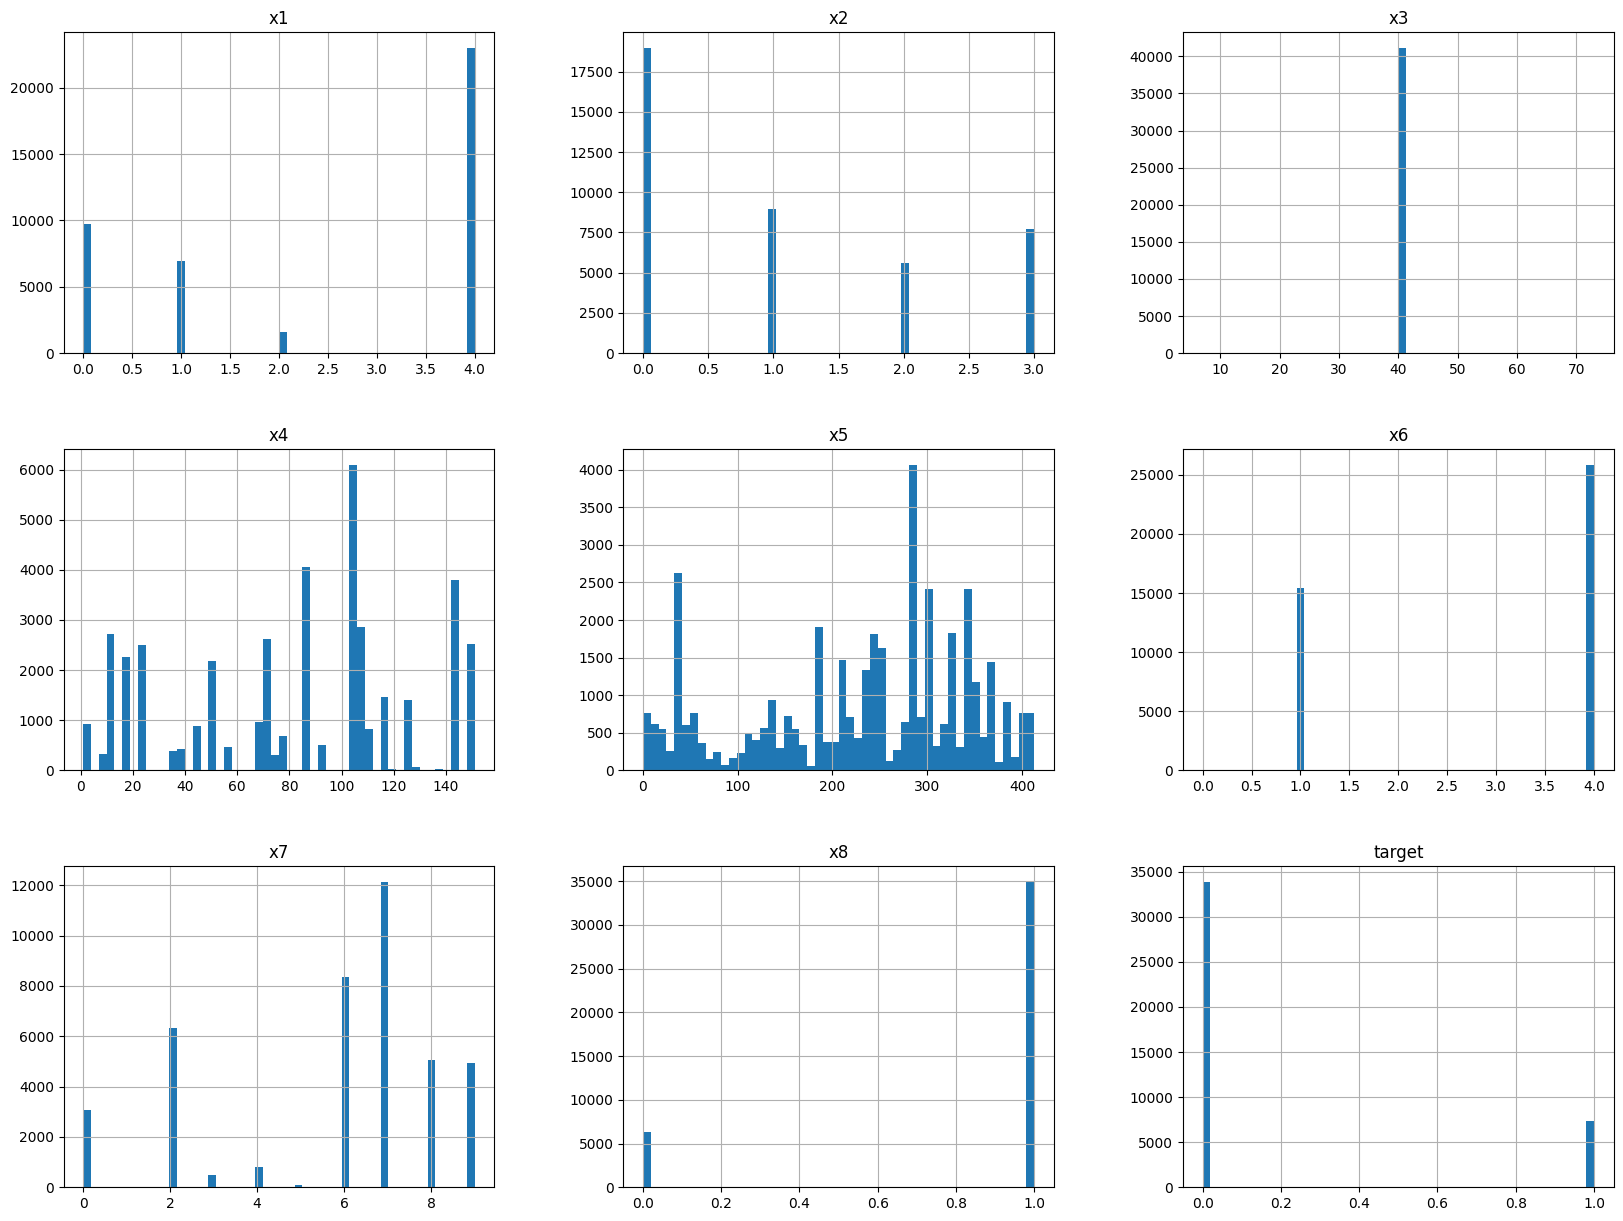

-----------------------8----------------------------


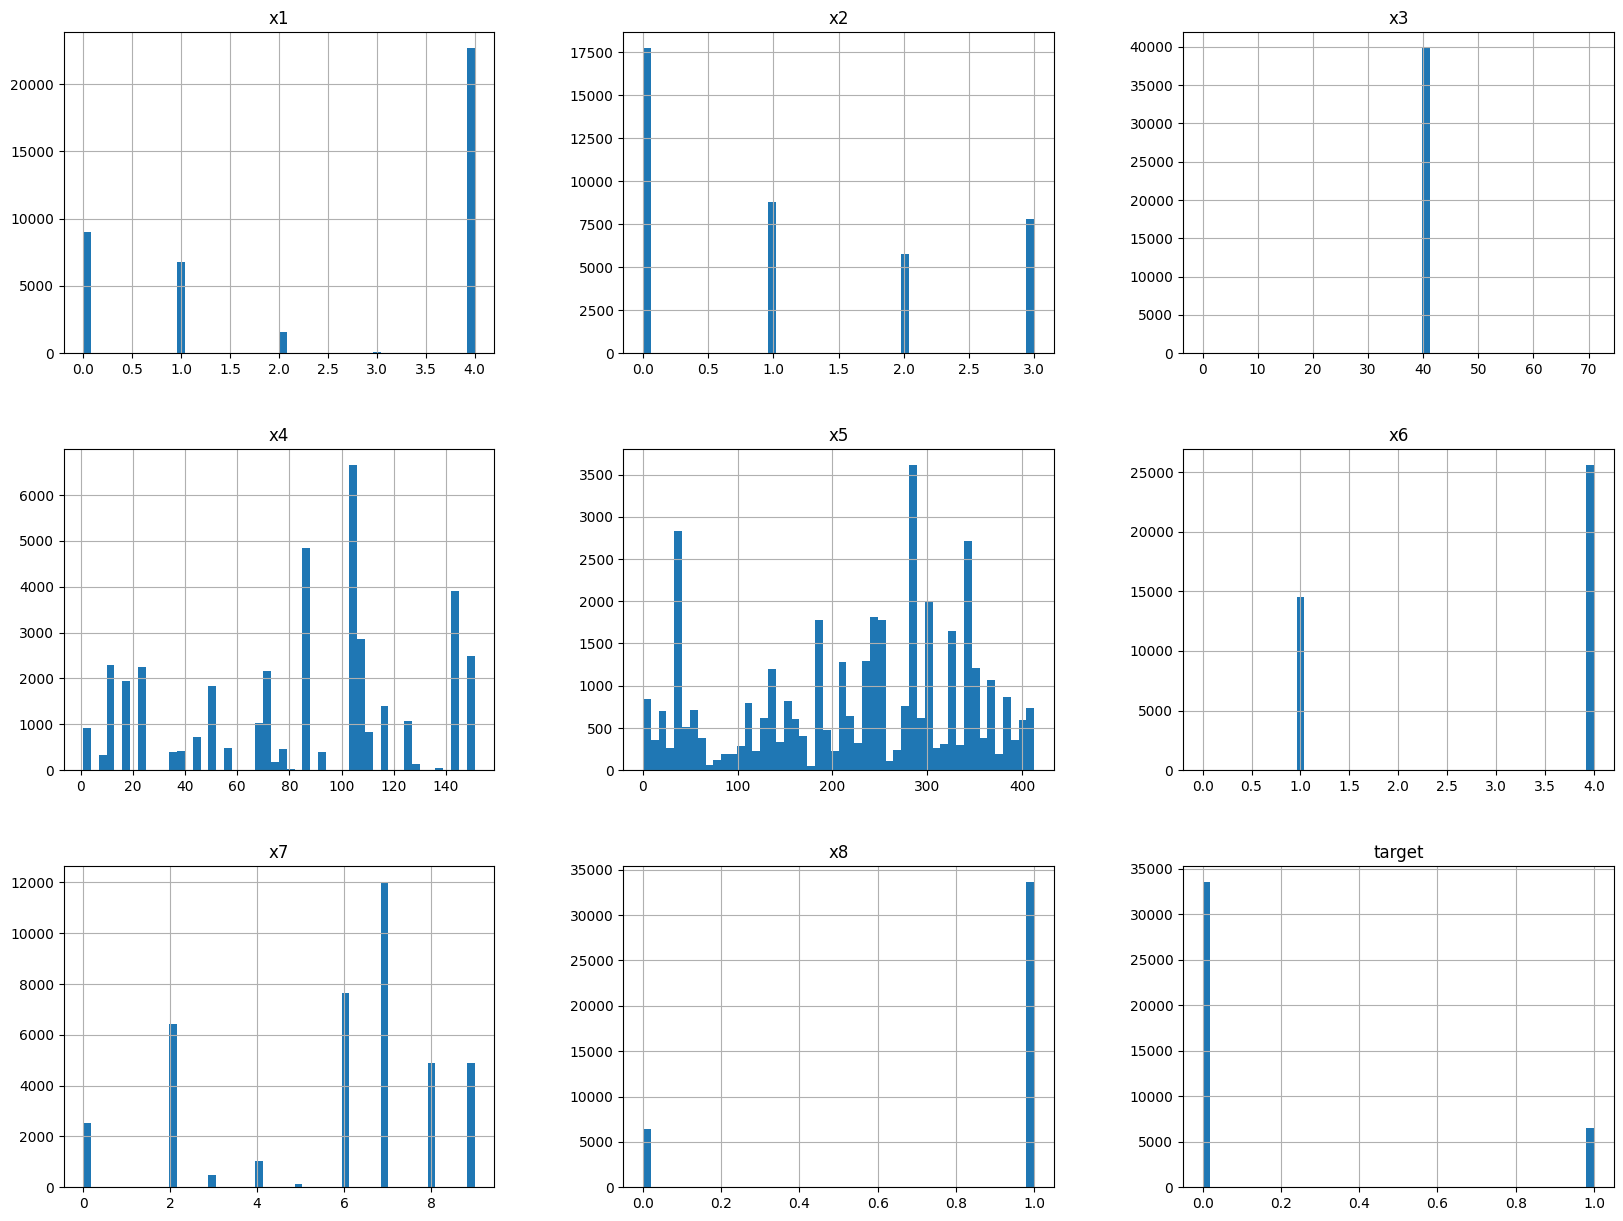

-----------------------9----------------------------


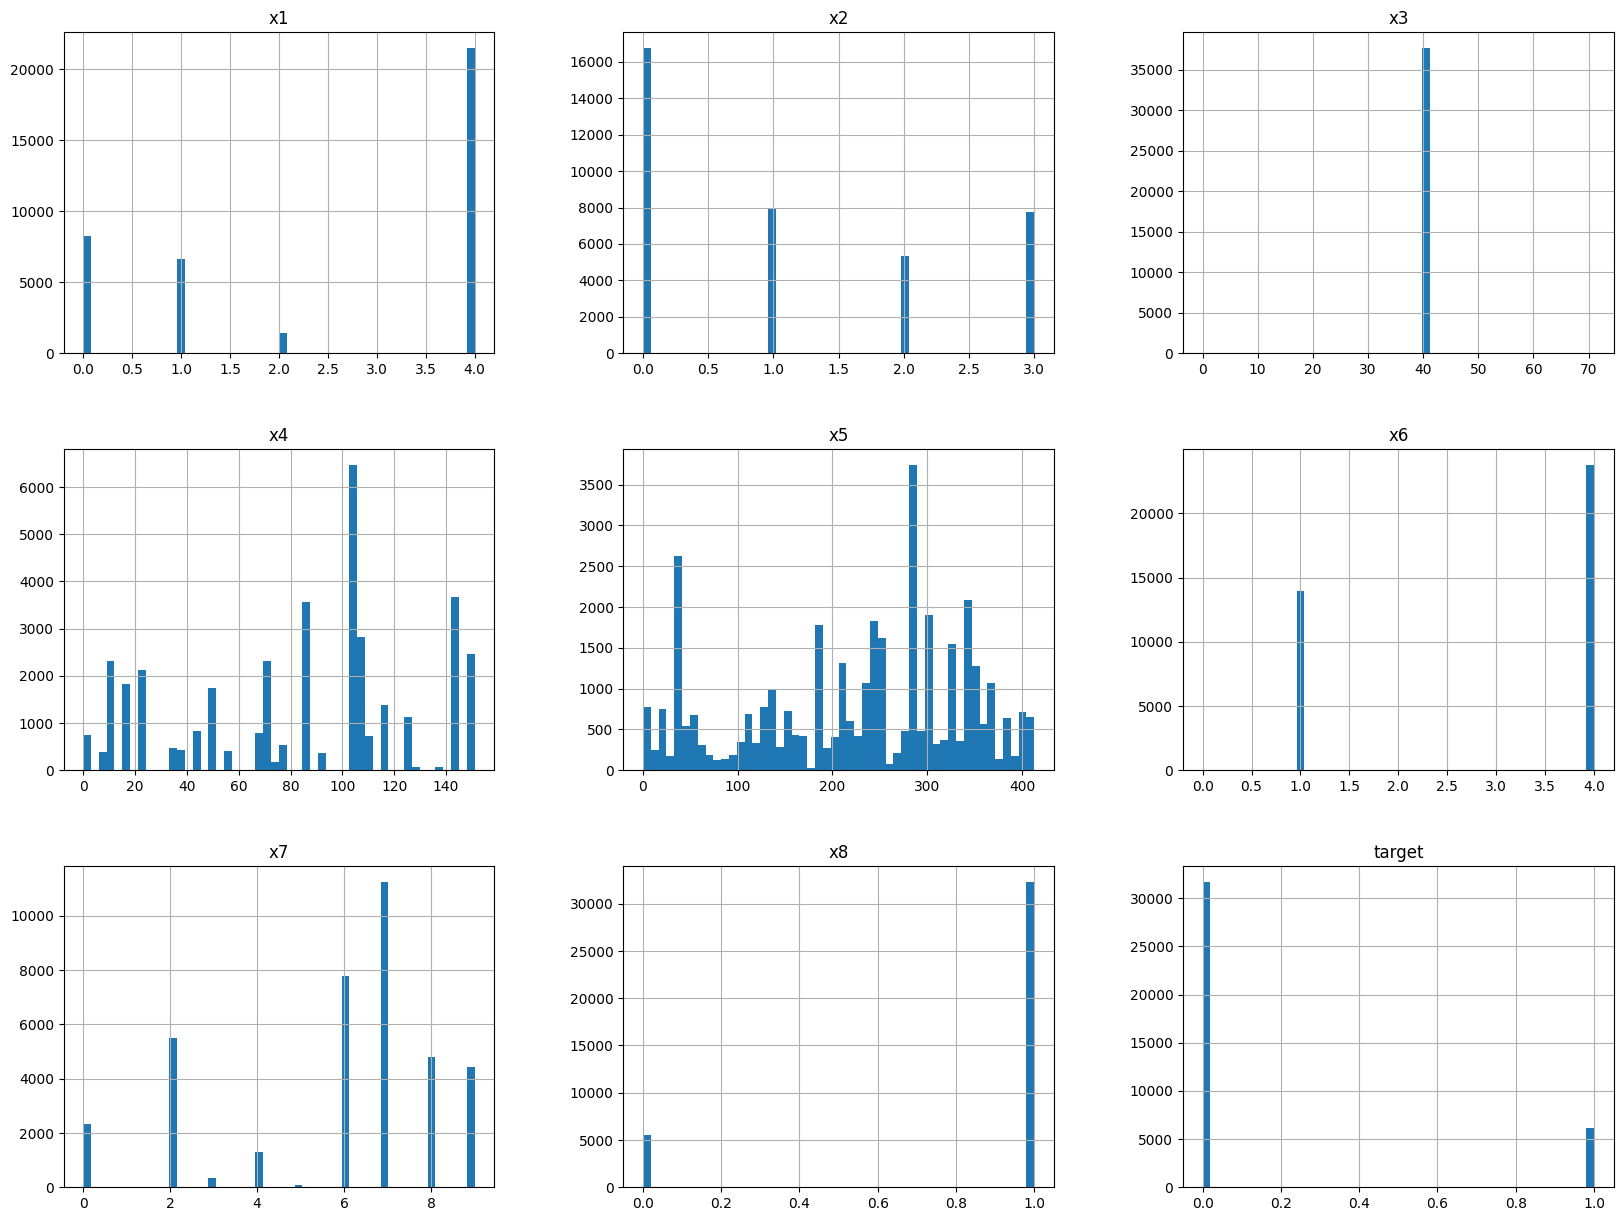

-----------------------10----------------------------


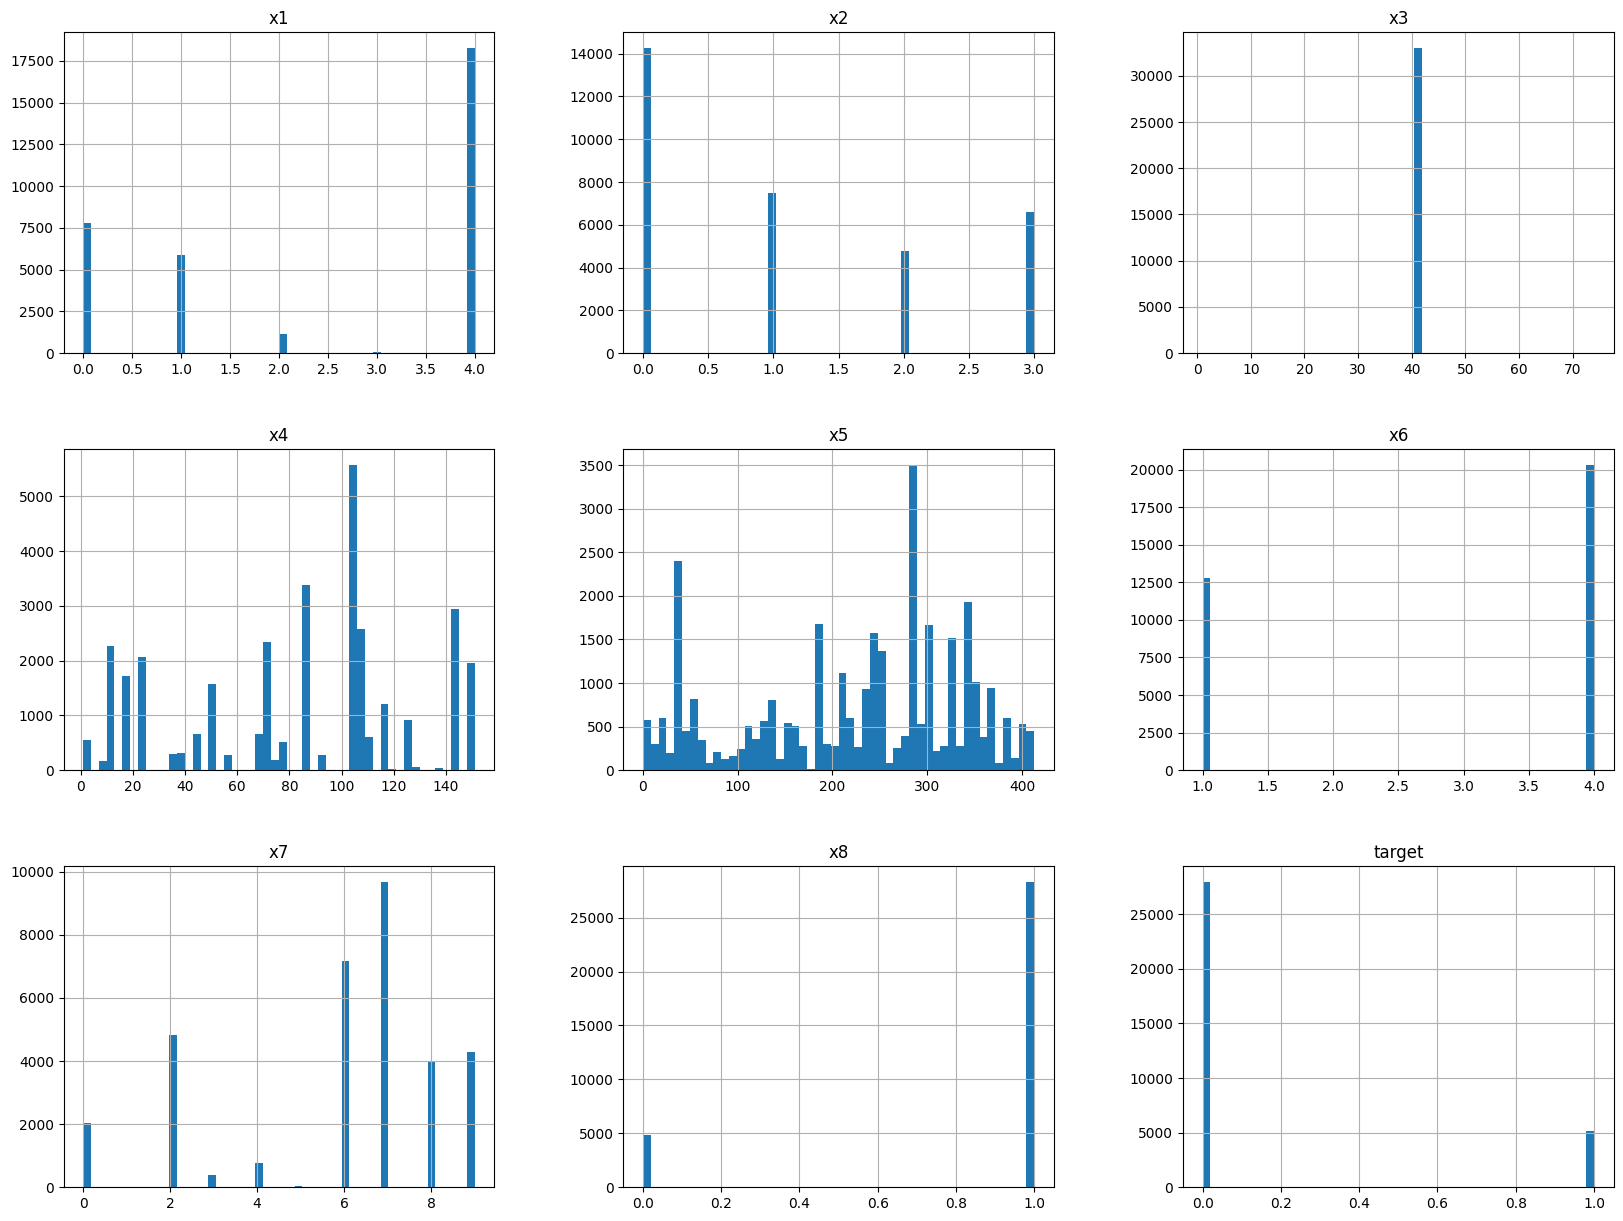

-----------------------11----------------------------


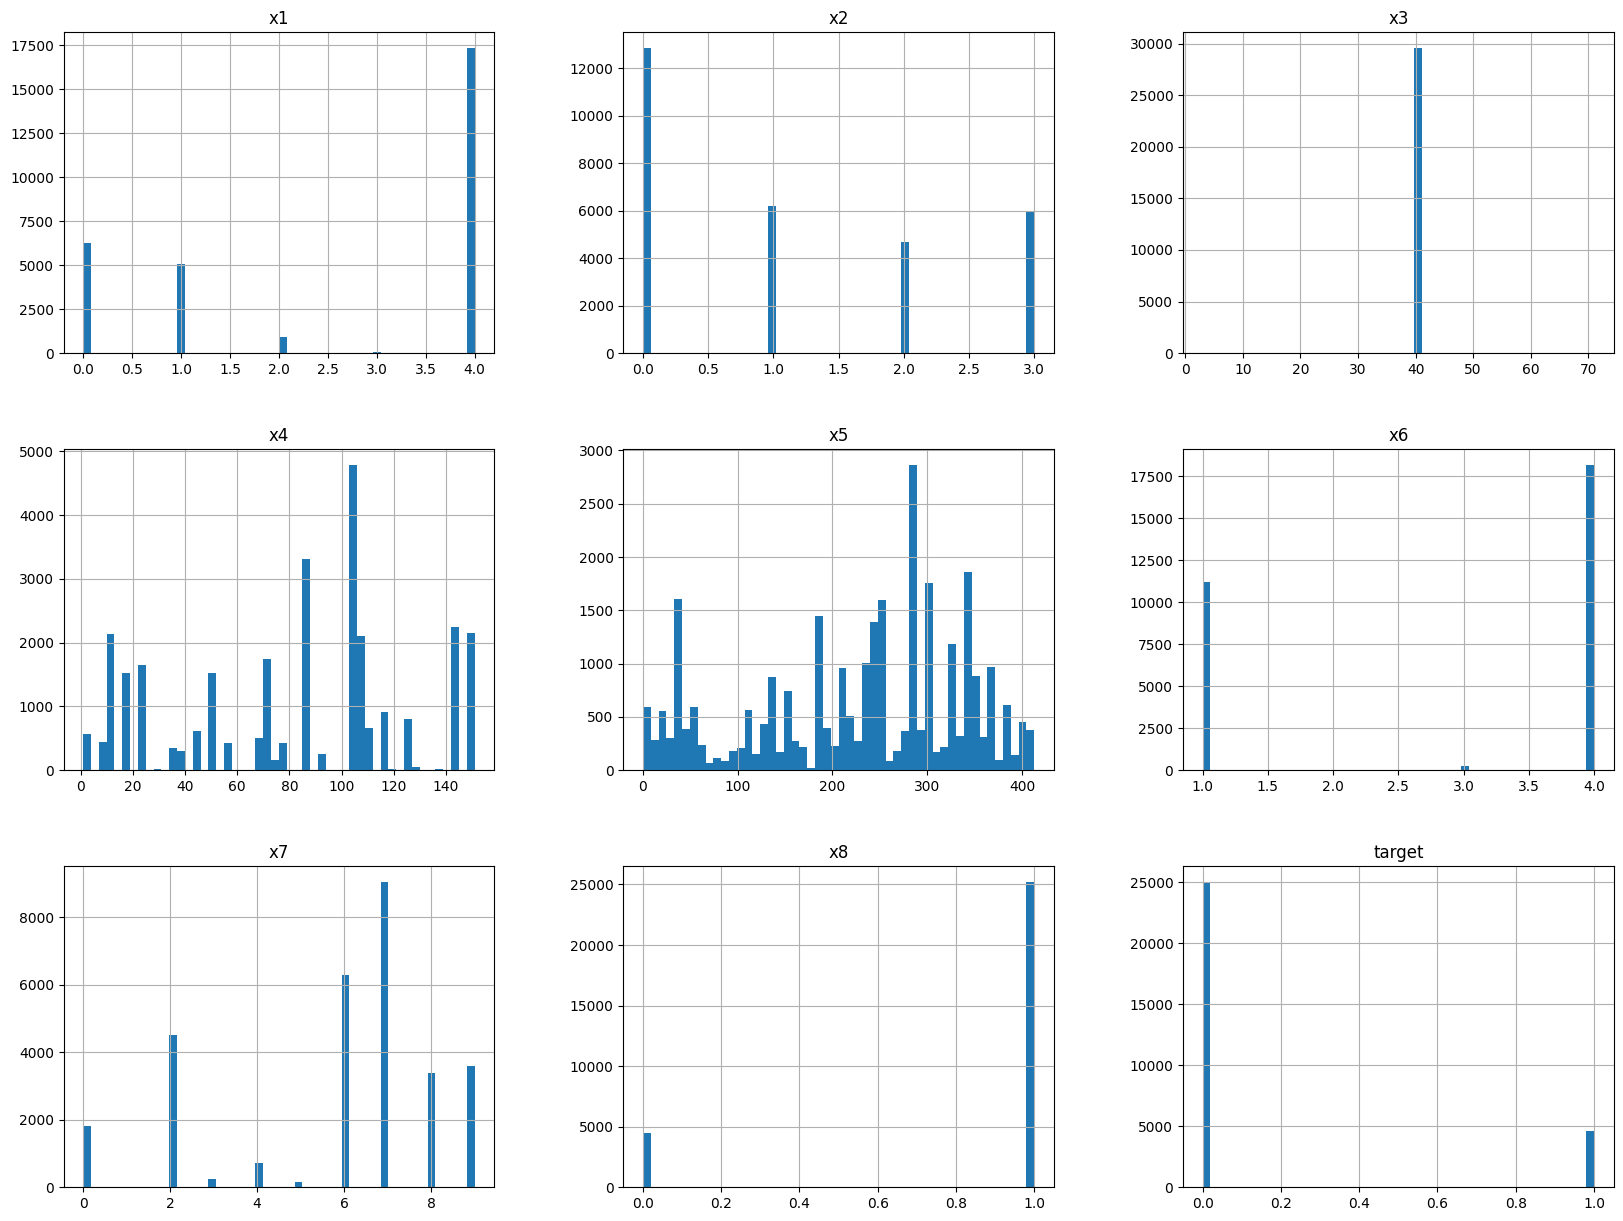

-----------------------12----------------------------


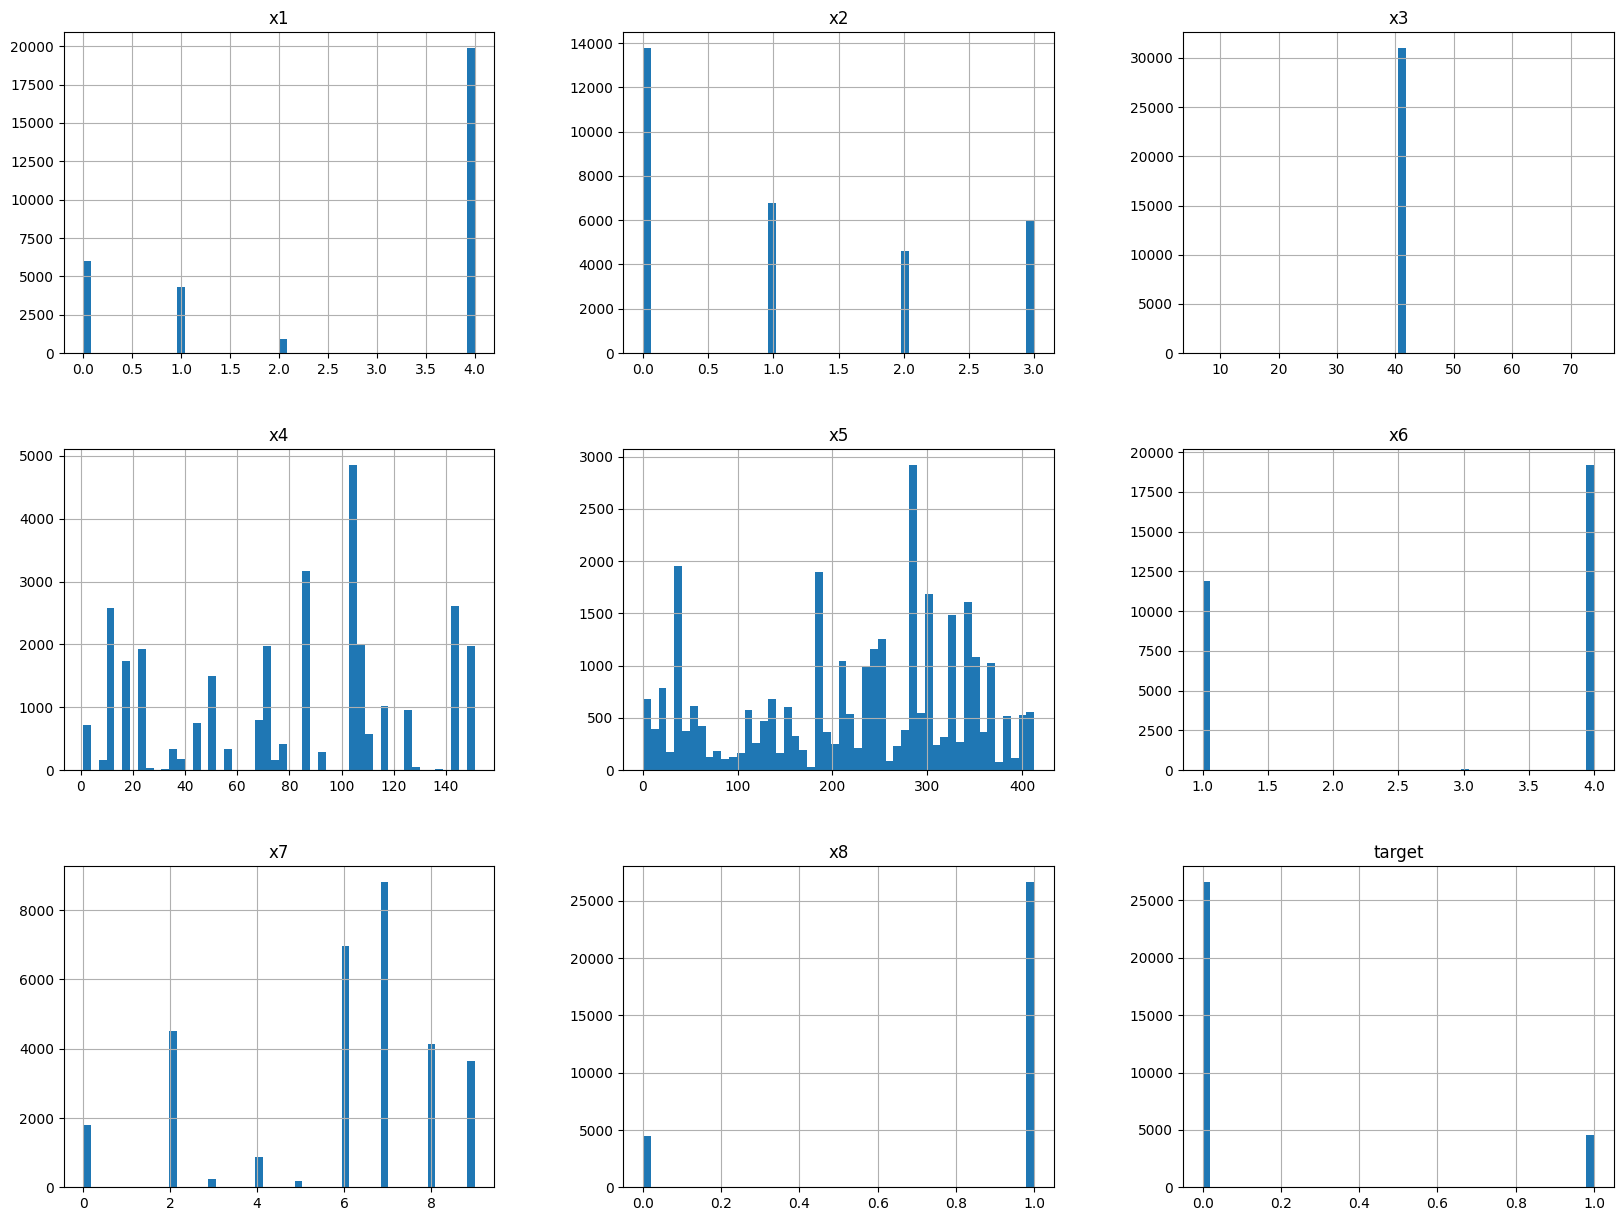

-----------------------13----------------------------


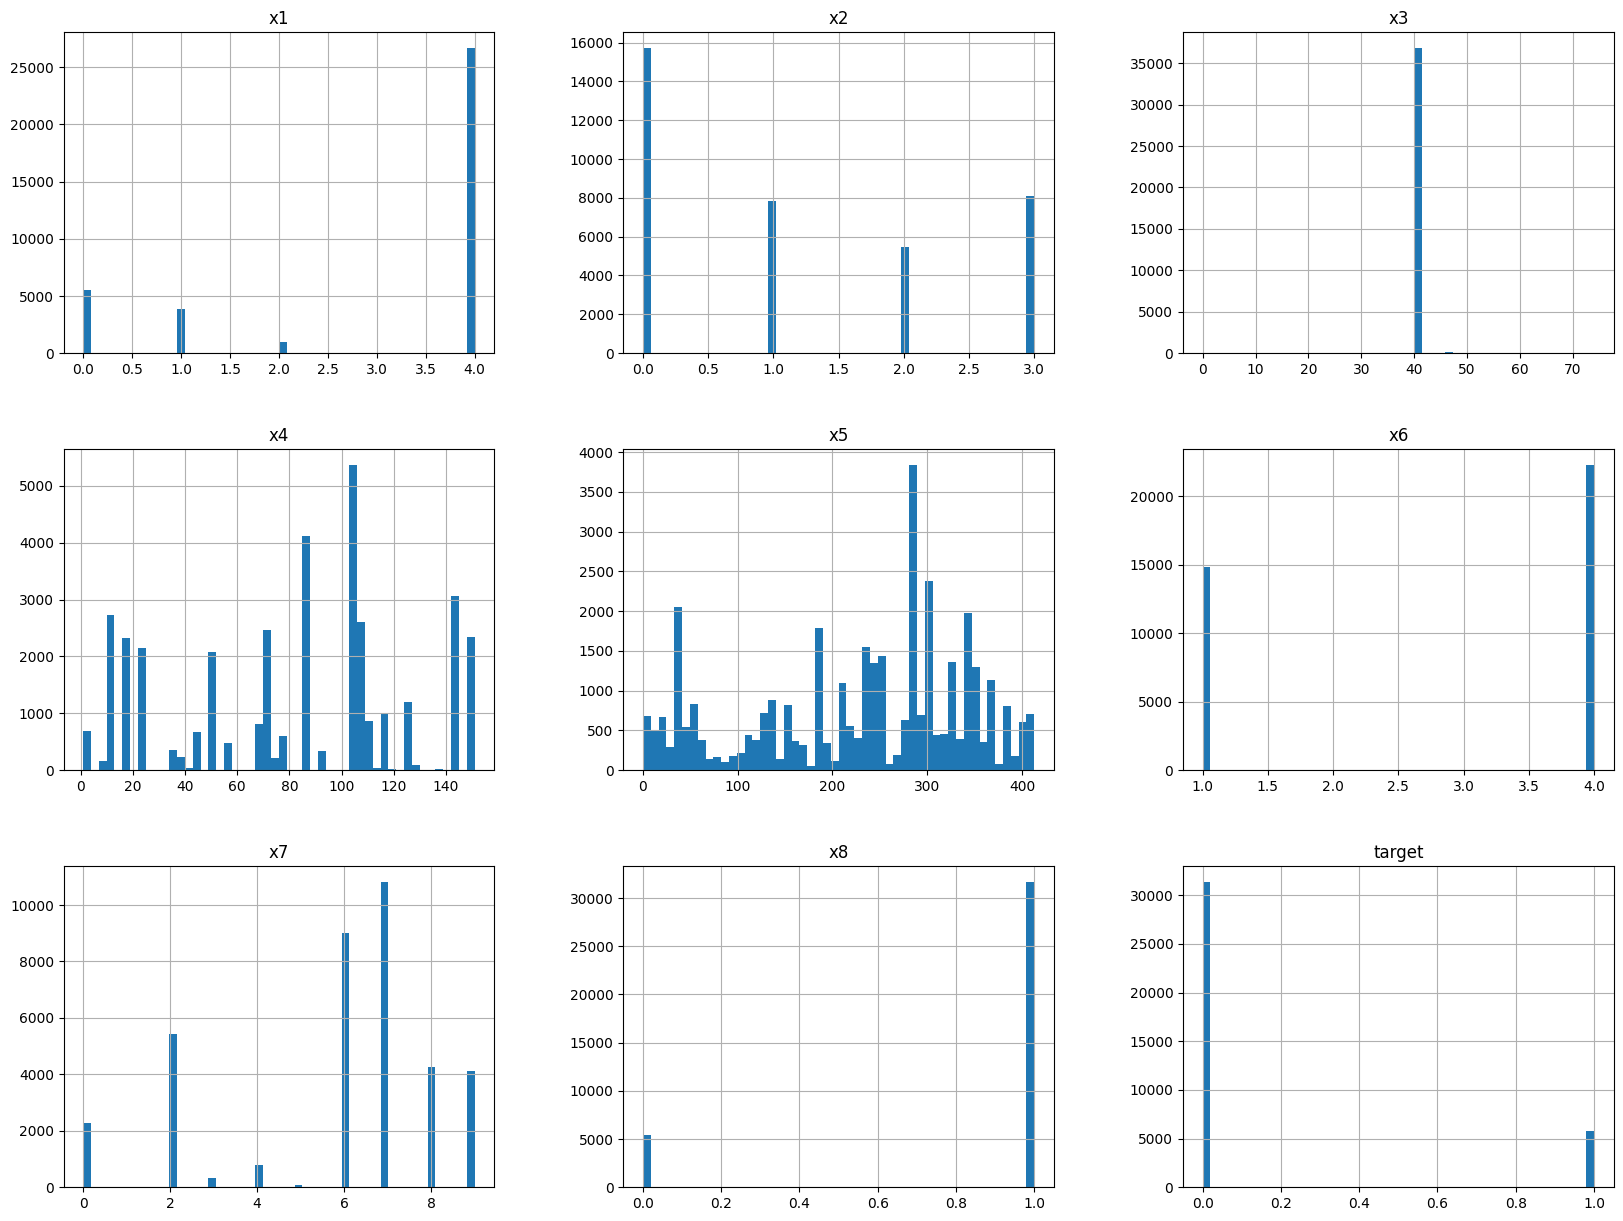

-----------------------14----------------------------


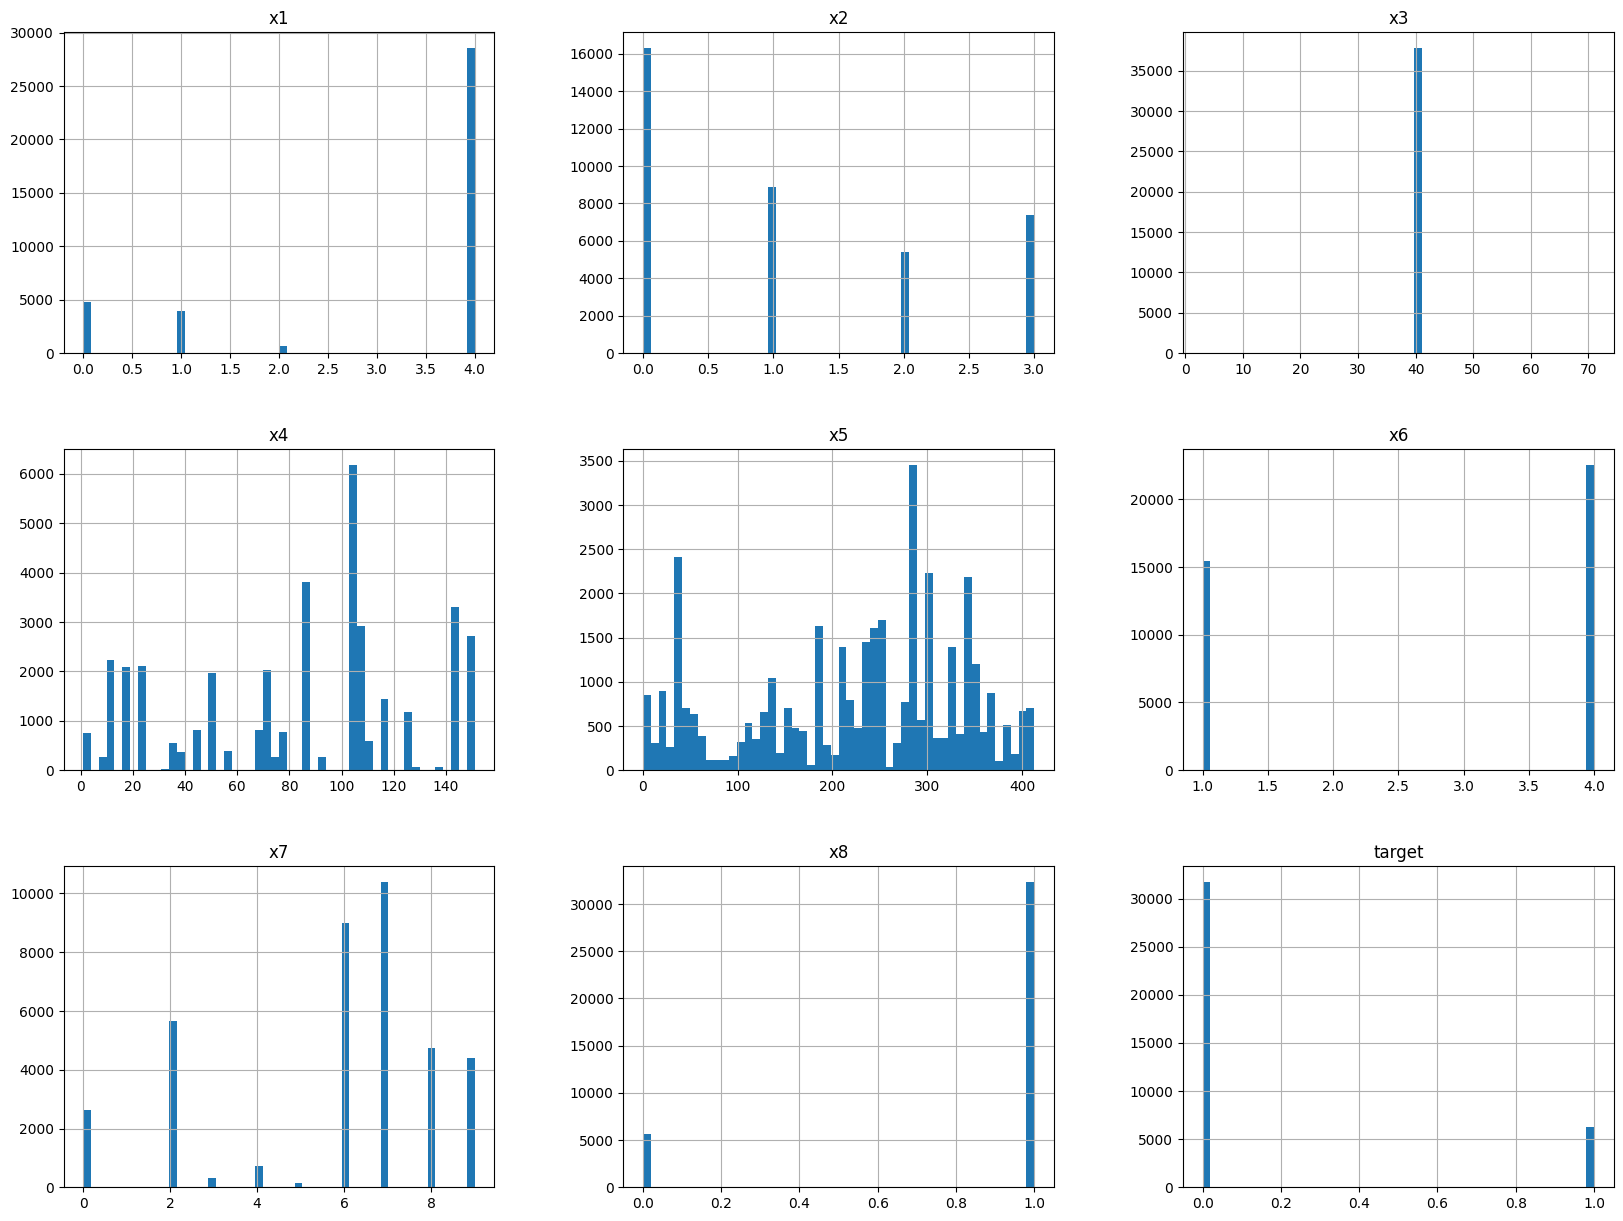

-----------------------15----------------------------


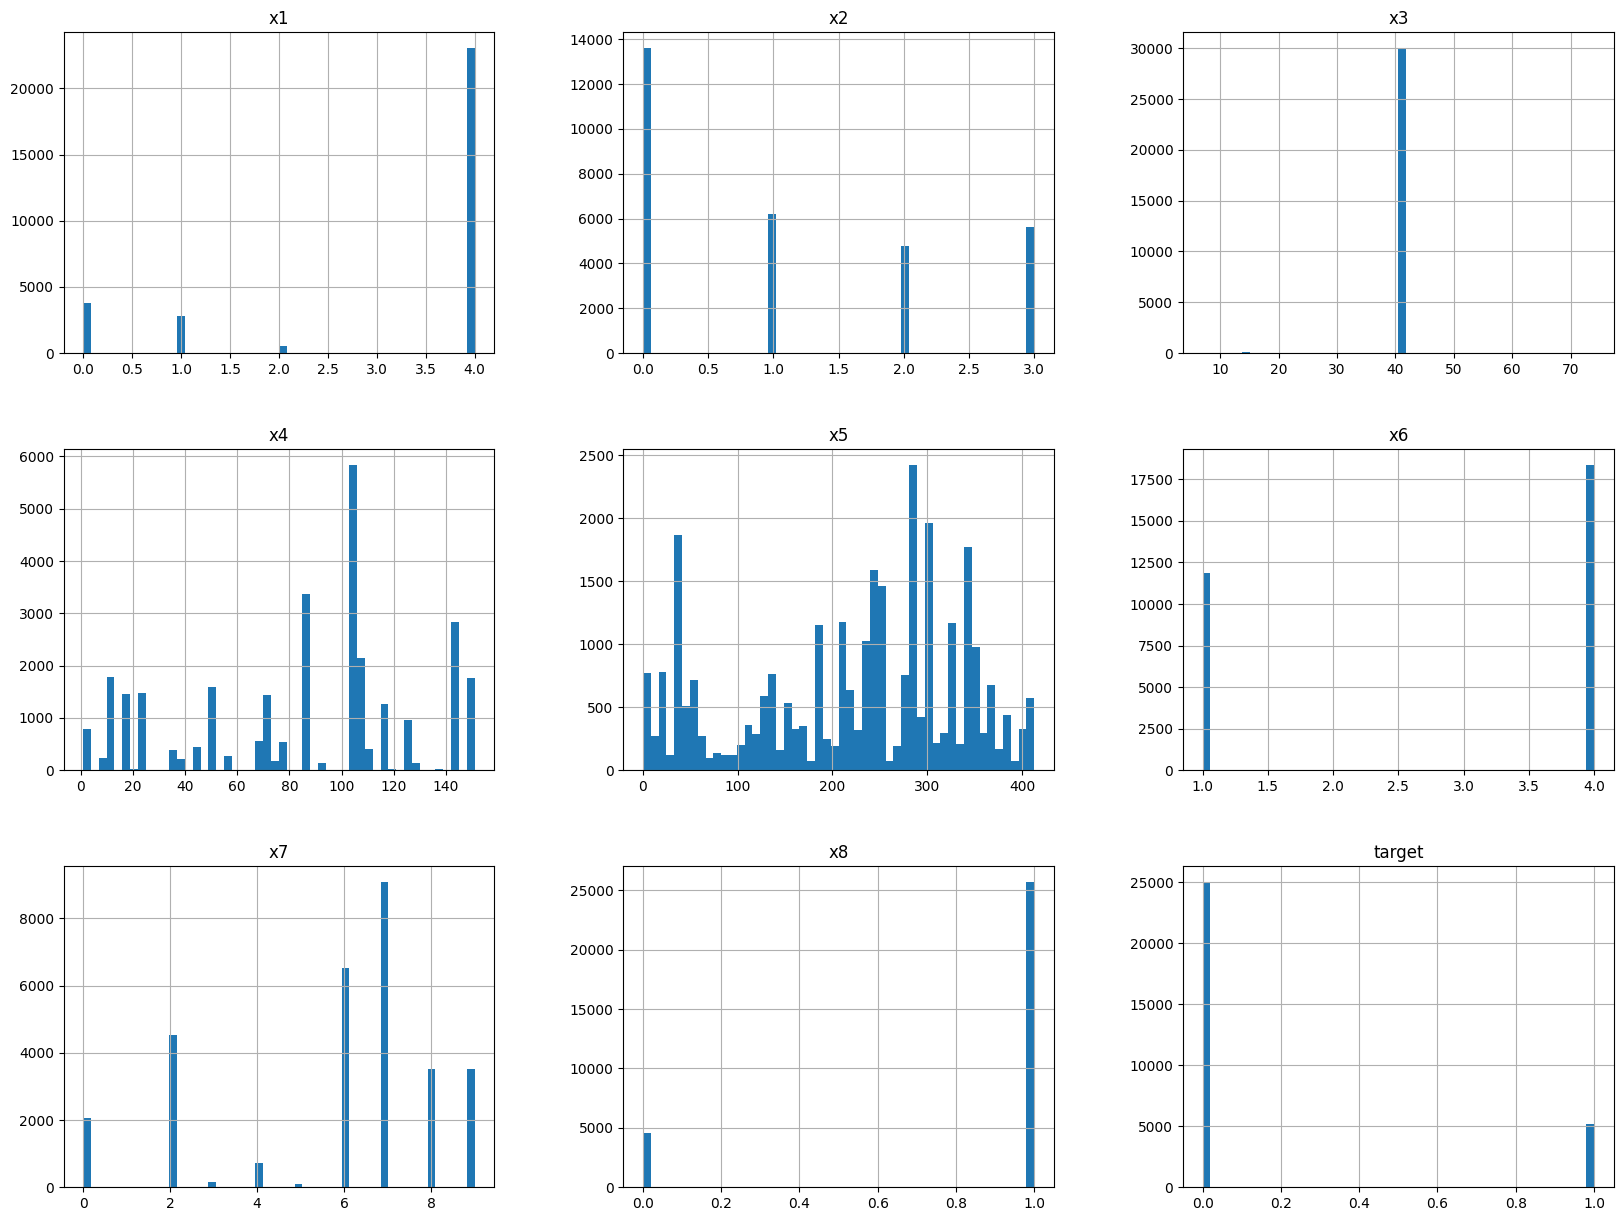

-----------------------16----------------------------


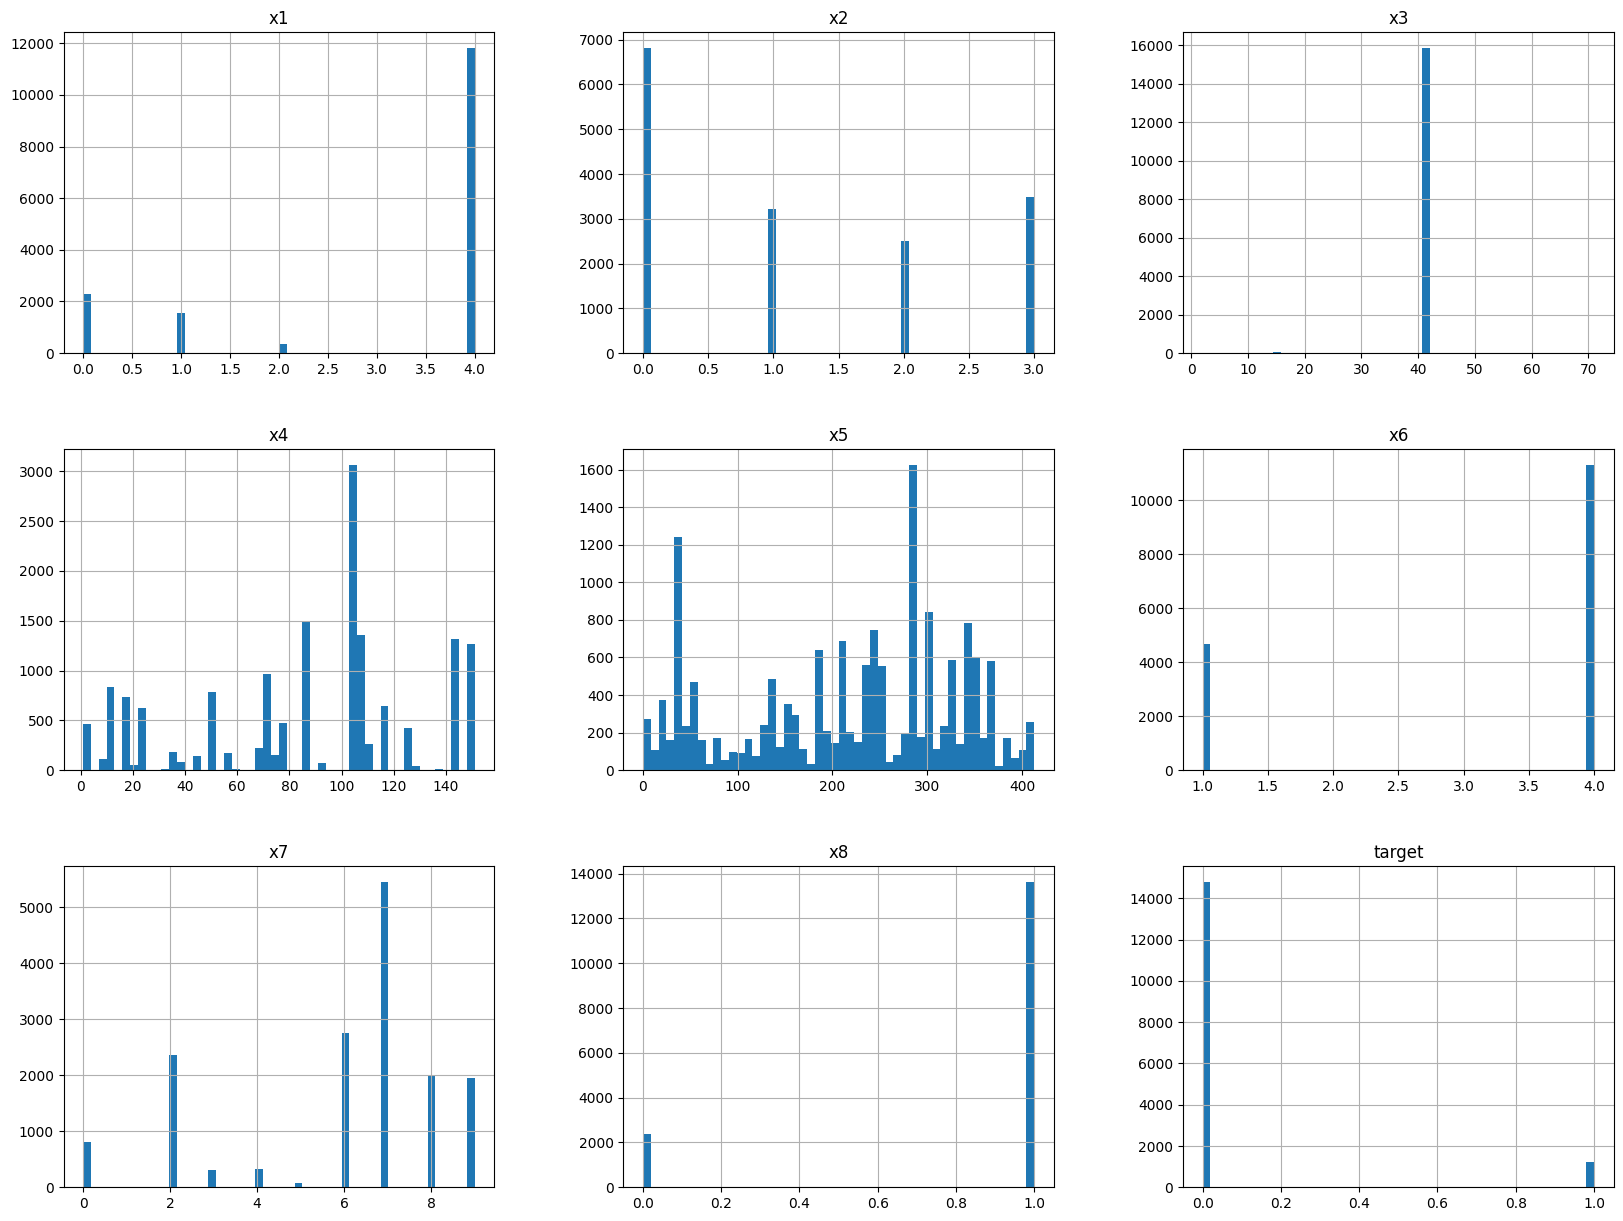

-----------------------17----------------------------


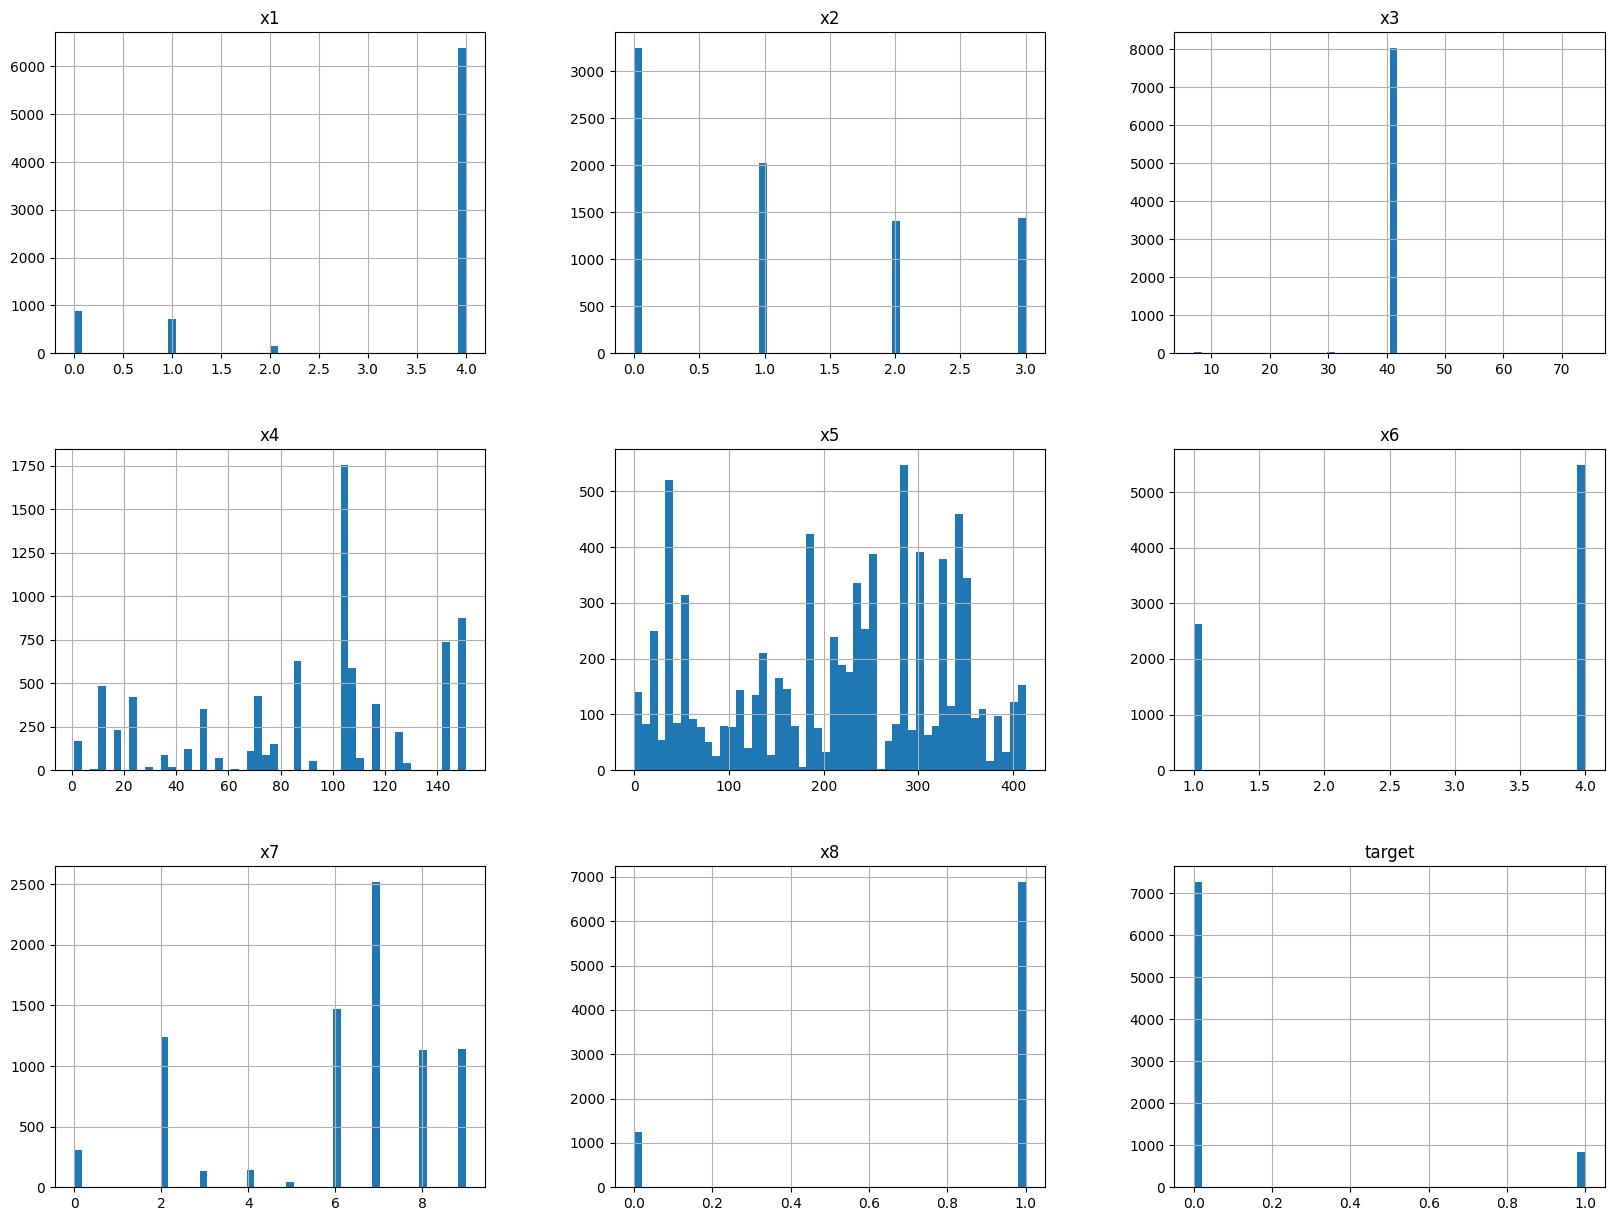

-----------------------18----------------------------


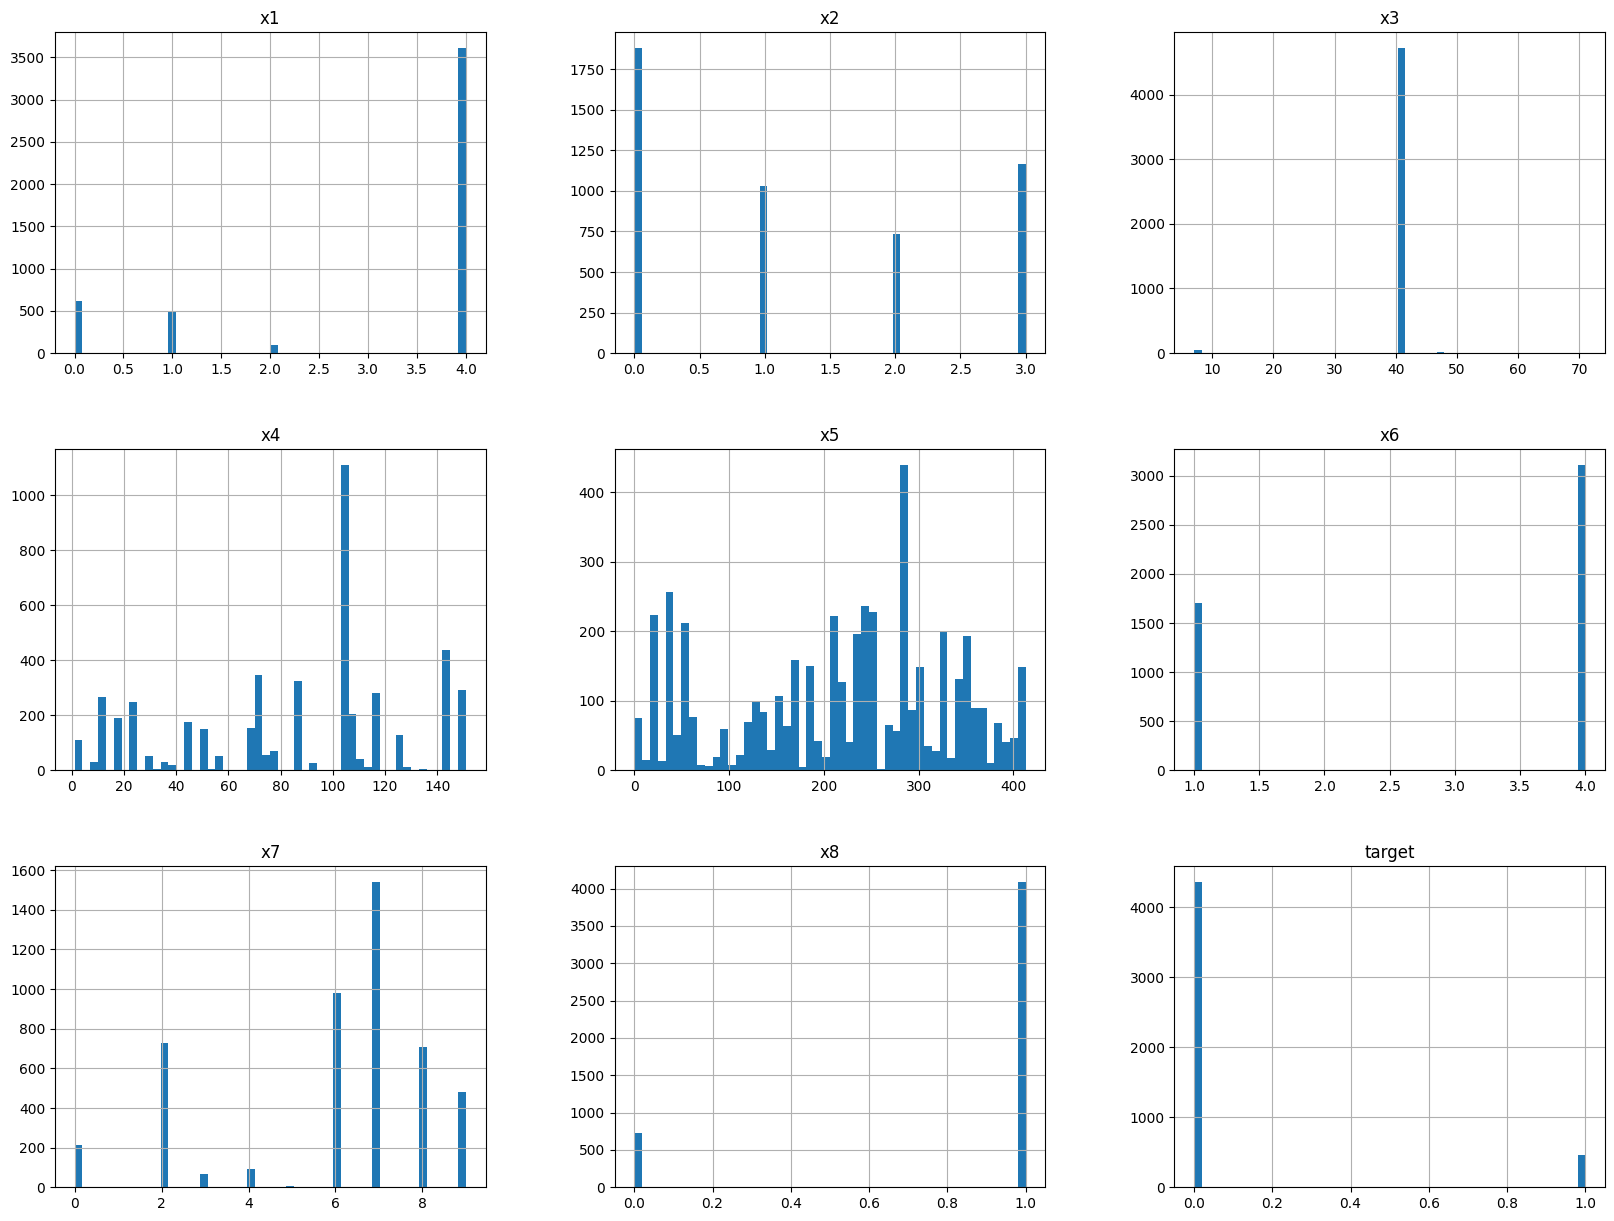

-----------------------19----------------------------


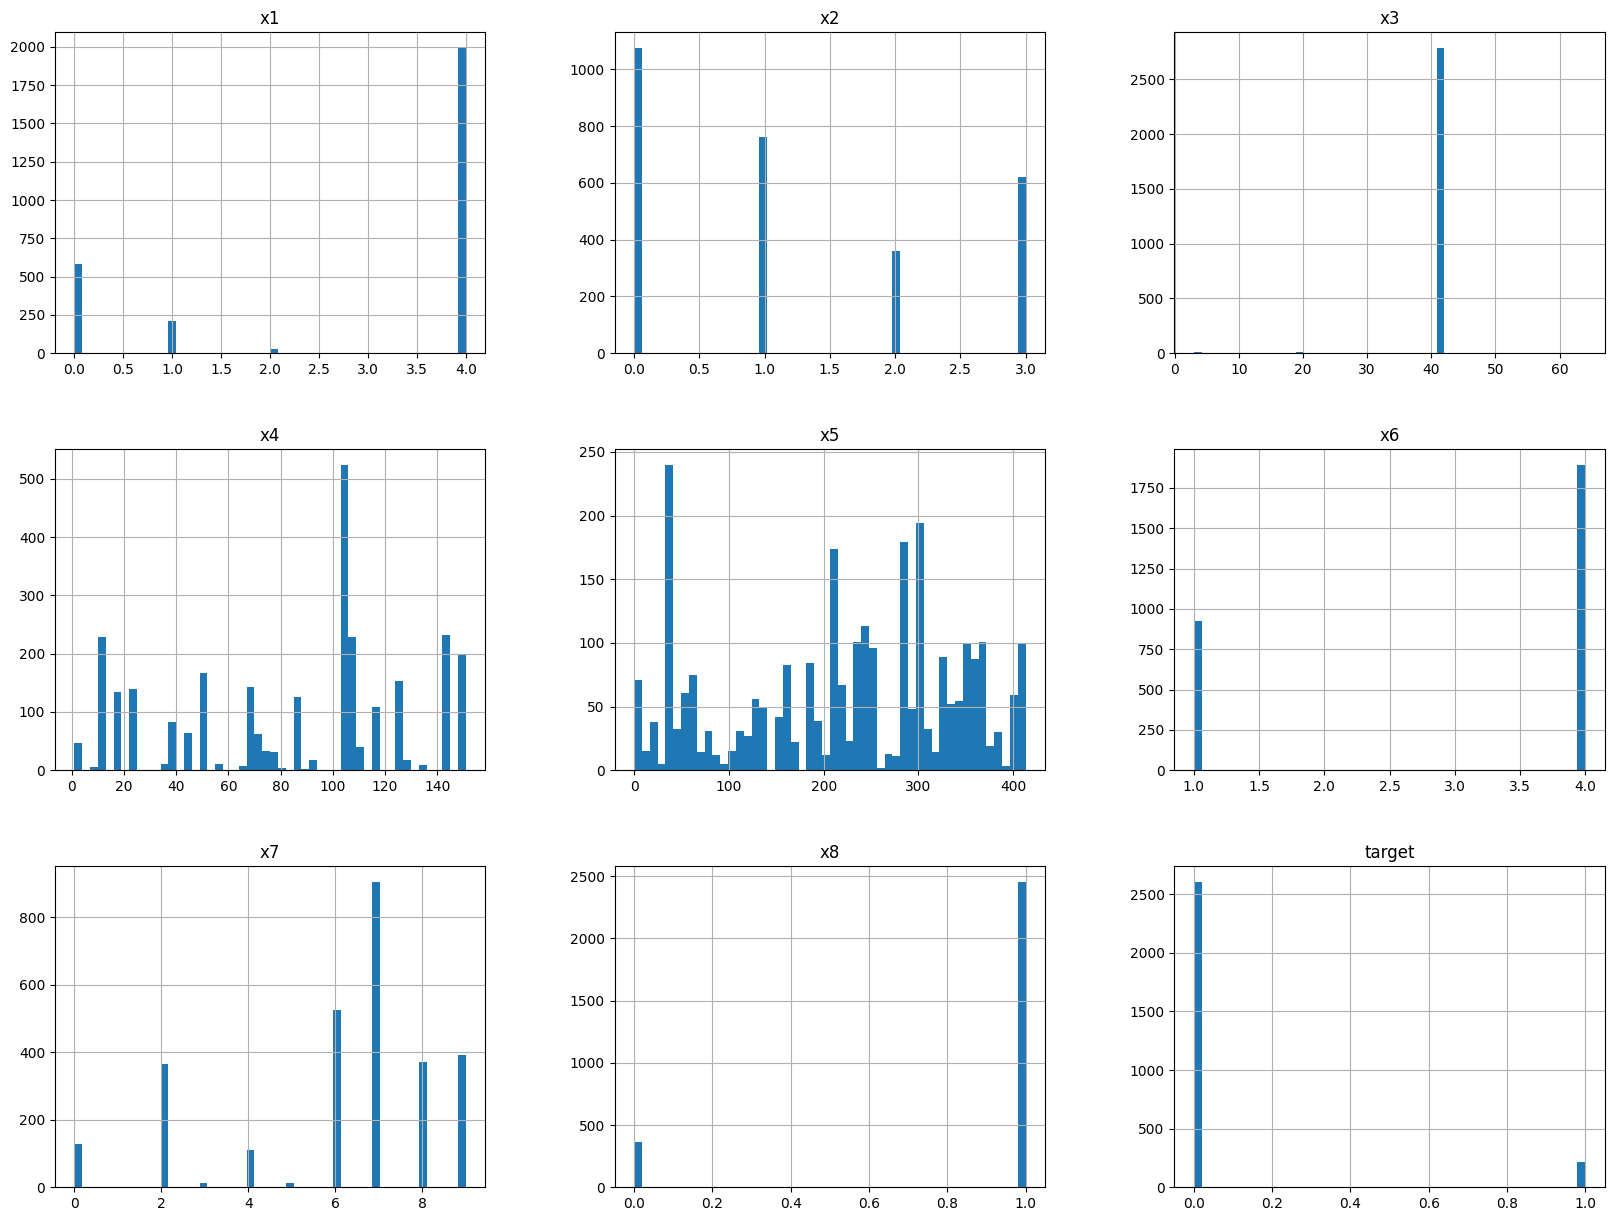

-----------------------20----------------------------


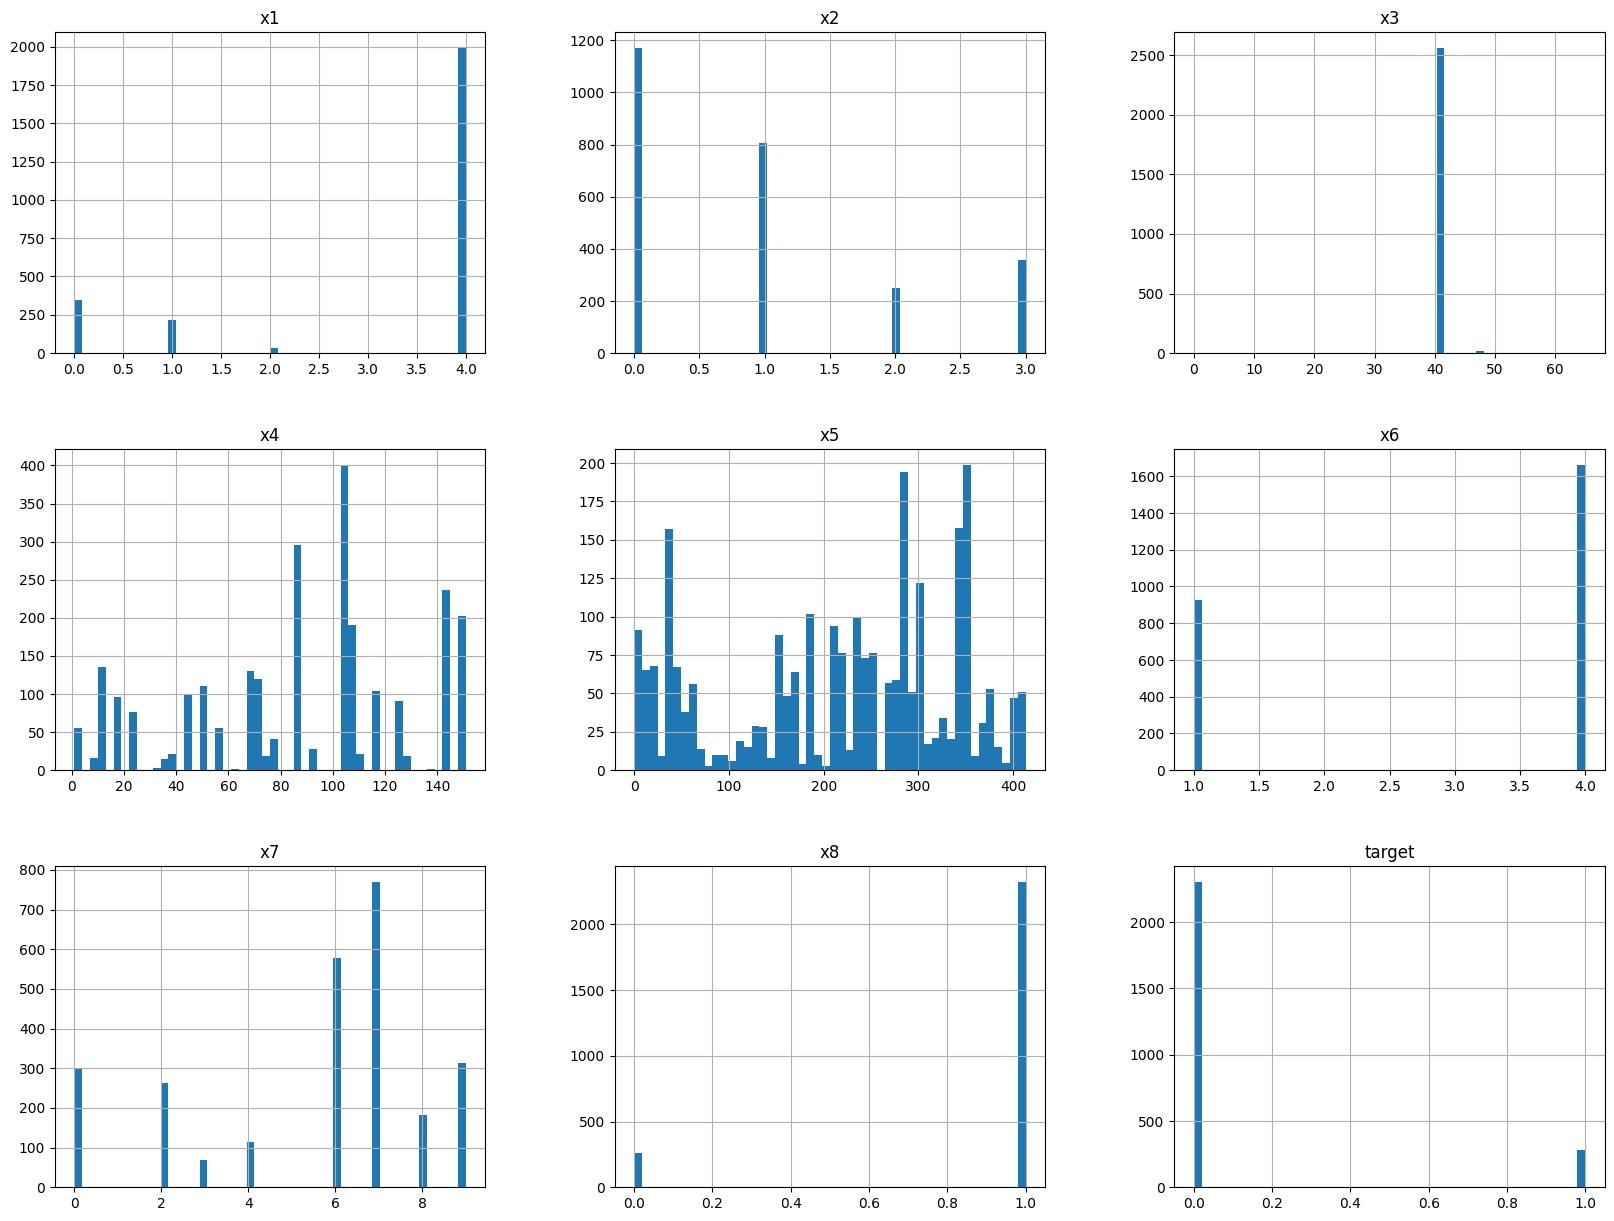

-----------------------21----------------------------


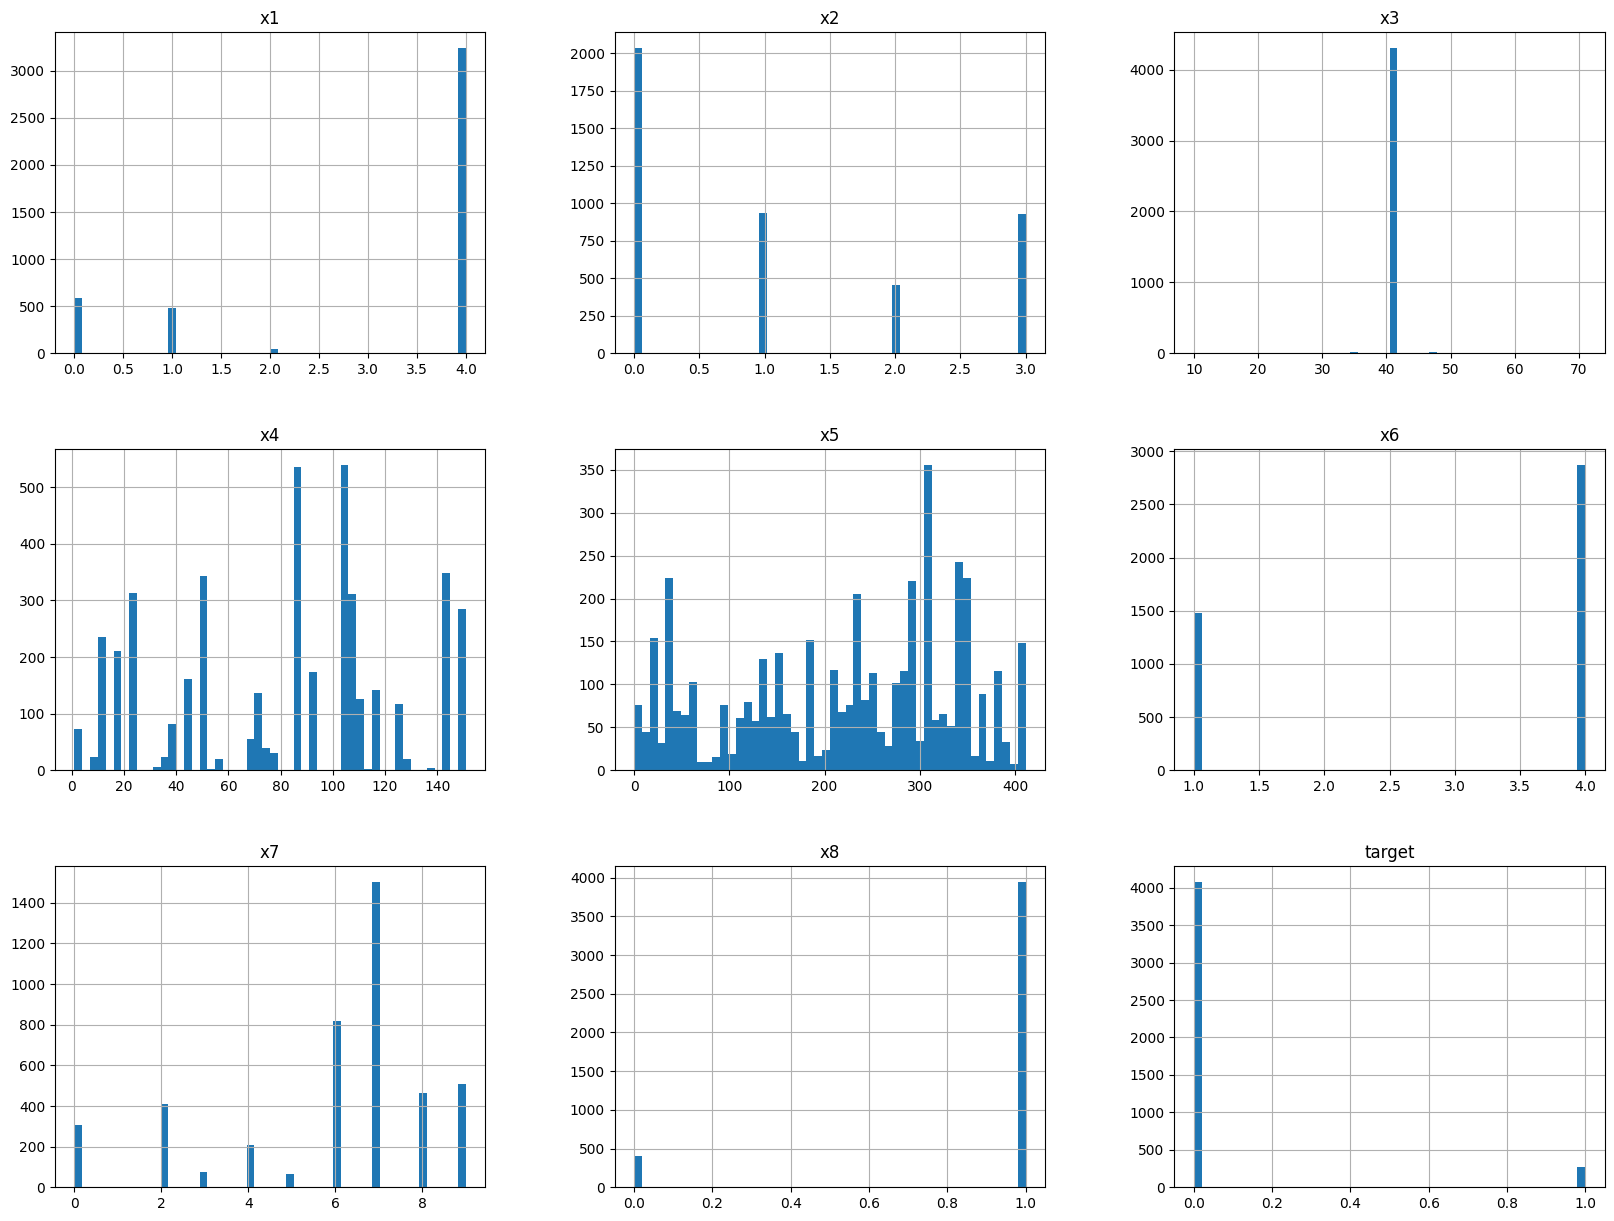

-----------------------22----------------------------


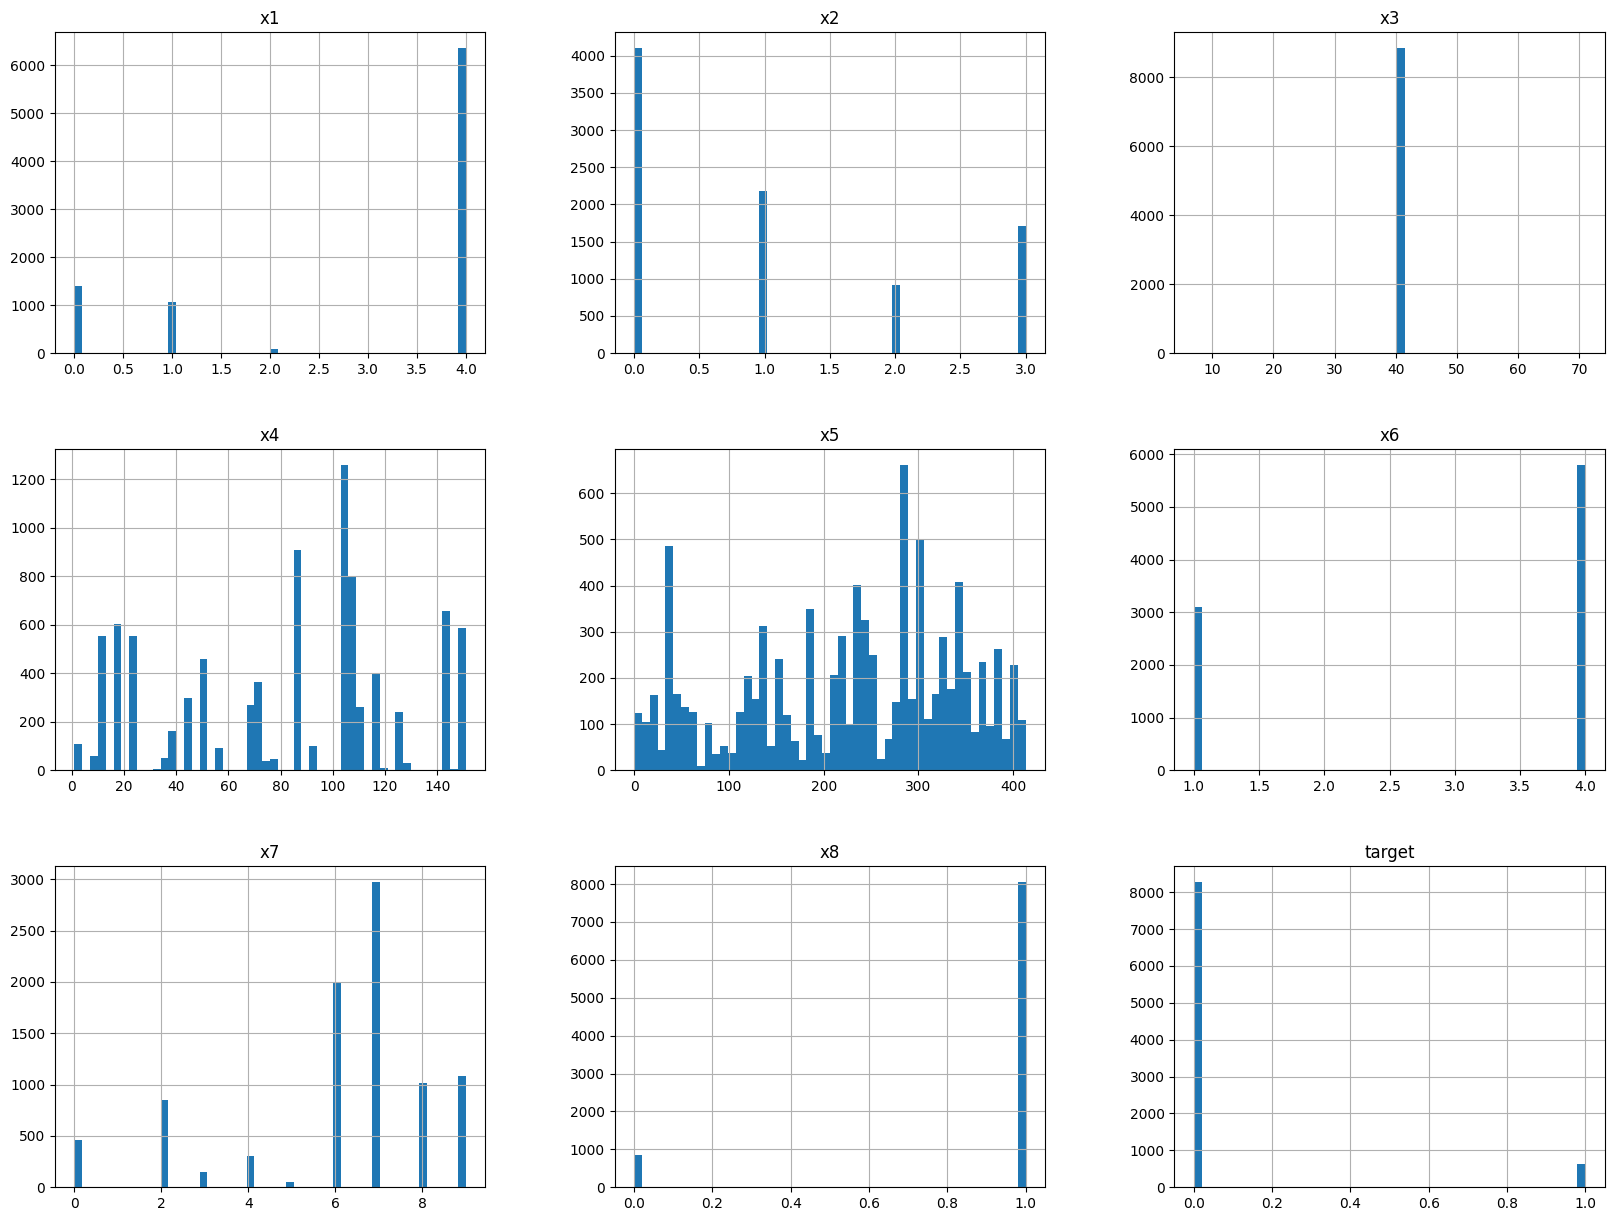

-----------------------23----------------------------


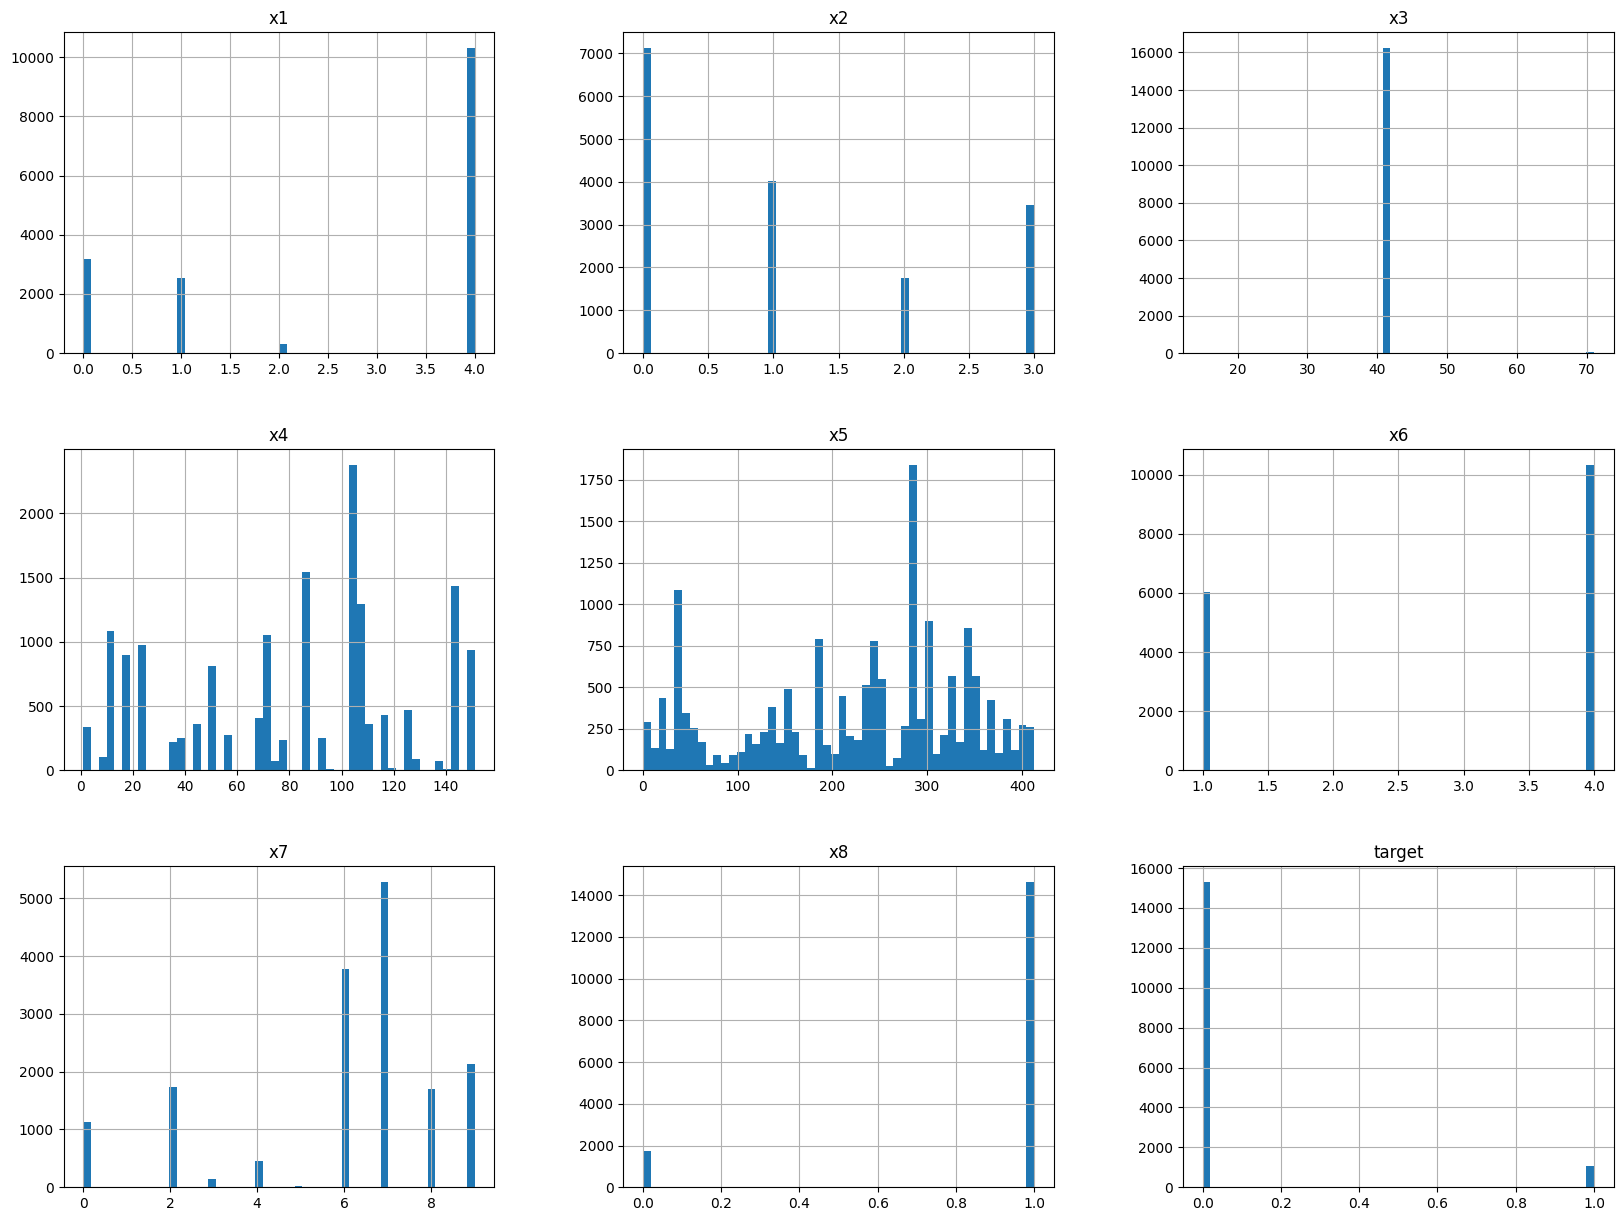

In [54]:
for val in range(24):
    print("-----------------------"+str(val)+"----------------------------")
    train_data[train_data['common_ts_hour']==val].iloc[:,4:13].hist(bins=50,figsize=(20,15))
    plt.show()

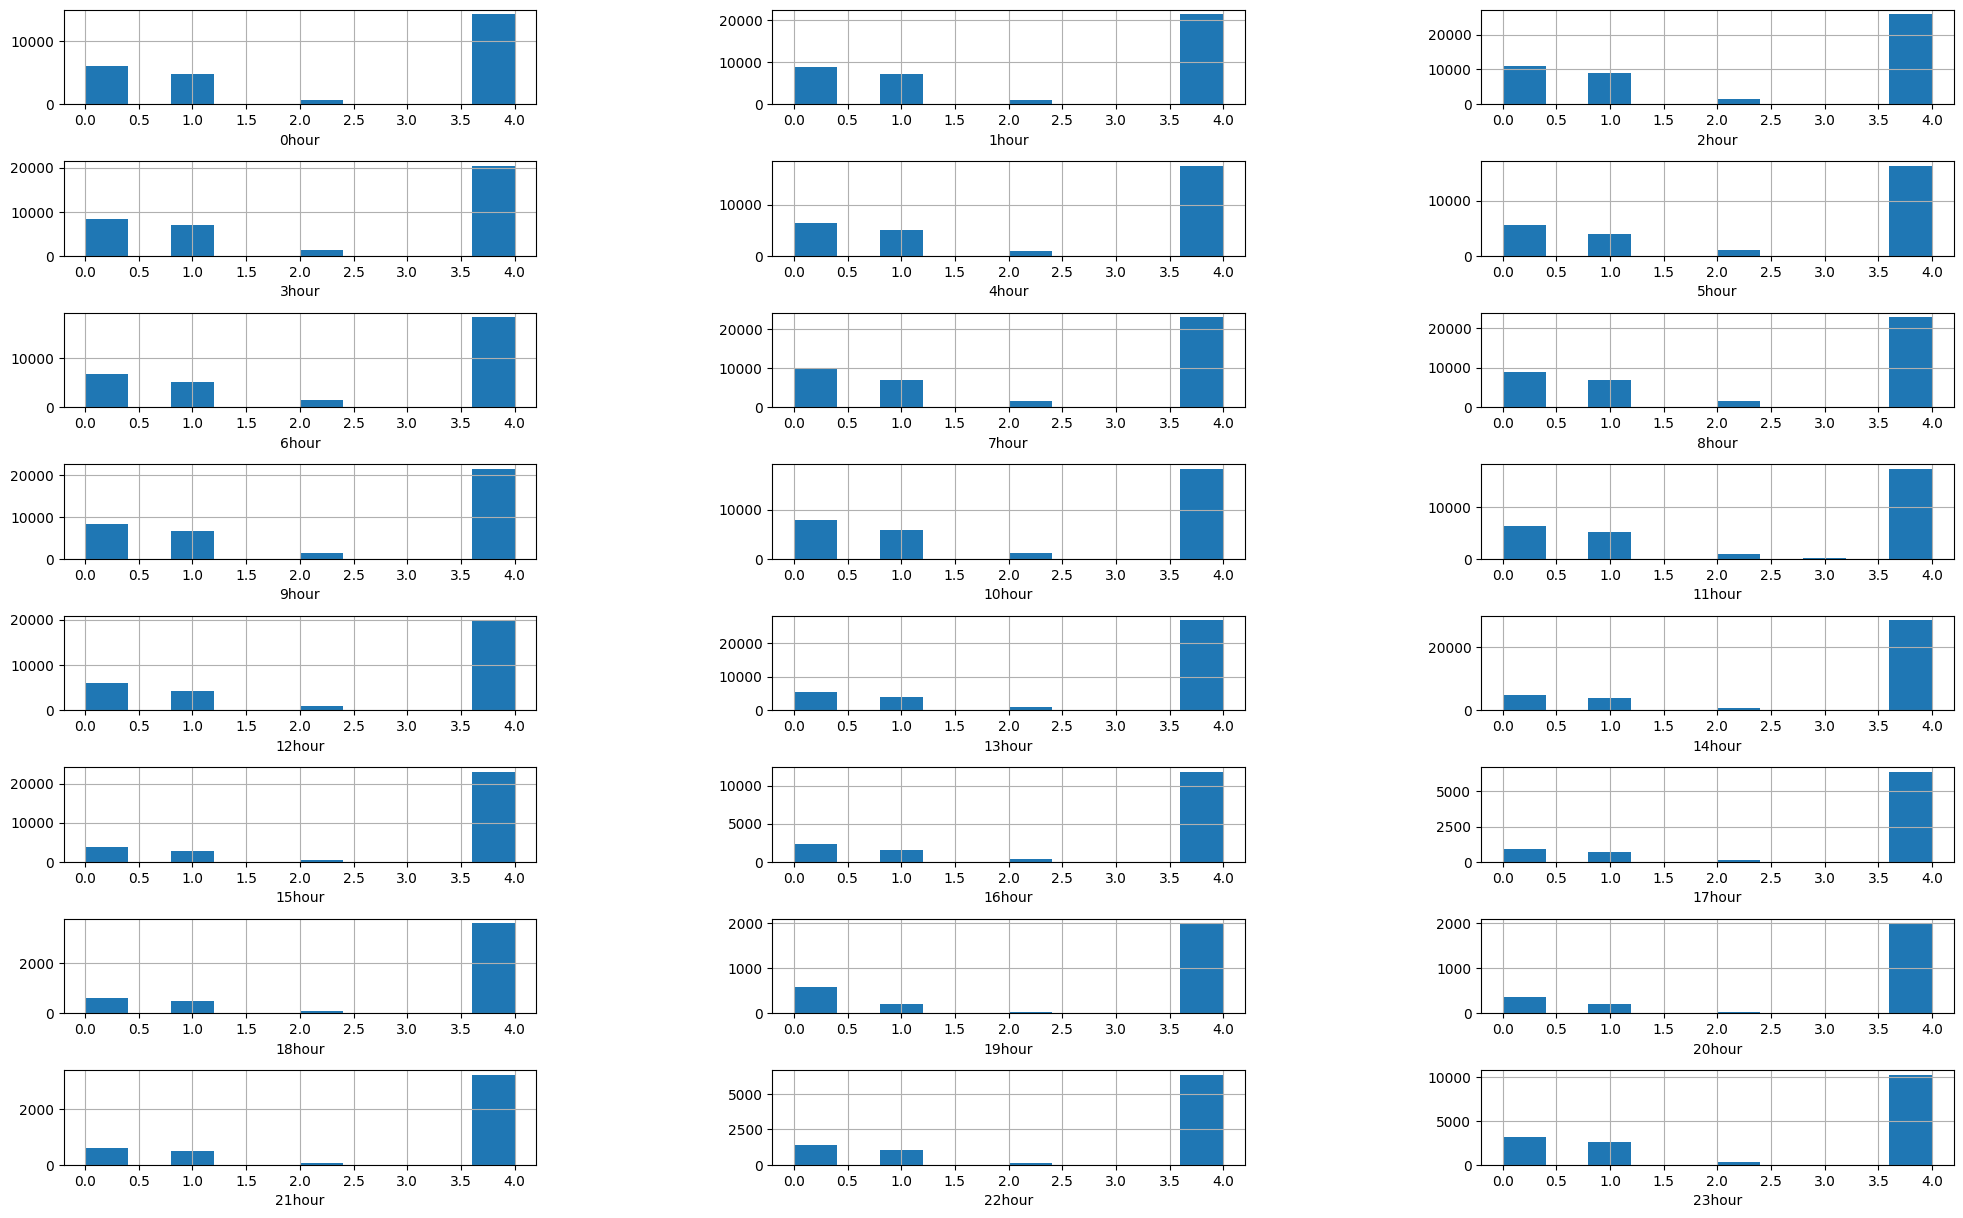

In [86]:
#for i in range(4,13):
plt.subplots(8,3,figsize=(20,15))
plt.subplots_adjust(top=0.97, bottom=0.2, left=0.05, right=0.995, hspace=0.6, wspace=0.5)
for val in range(24):
    plt.subplot(8,3,1+val)
    train_data[train_data['common_ts_hour']==val].iloc[:,4].hist()
    plt.xlabel(str(val)+"hour")
plt.show()

In [87]:
def udmap_onethot(d):
    v = np.zeros(9)  # 创建一个长度为 9 的零数组
    if d == 'unknown':  # 如果 'udmap' 的值是 'unknown'
        return v  # 返回零数组
    d = eval(d)  # 将 'udmap' 的值解析为一个字典
    for i in range(1, 10):  # 遍历 'key1' 到 'key9', 注意, 这里不包括10本身
        if 'key' + str(i) in d:  # 如果当前键存在于字典中
            v[i-1] = d['key' + str(i)]  # 将字典中的值存储在对应的索引位置上
            
    return v  # 返回 One-Hot 编码后的数组

# 注: 对于不理解的步骤, 可以逐行 print 内容查看
# 使用 apply() 方法将 udmap_onethot 函数应用于每个样本的 'udmap' 列
# np.vstack() 用于将结果堆叠成一个数组
train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onethot)))
test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onethot)))
# 为新的特征 DataFrame 命名列名
train_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]
test_udmap_df.columns = ['key' + str(i) for i in range(1, 10)]
# 将编码后的 udmap 特征与原始数据进行拼接，沿着列方向拼接
train_data = pd.concat([train_data, train_udmap_df], axis=1)
test_data = pd.concat([test_data, test_udmap_df], axis=1)


# 4. 编码 udmap 是否为空
# 使用比较运算符将每个样本的 'udmap' 列与字符串 'unknown' 进行比较，返回一个布尔值的 Series
# 使用 astype(int) 将布尔值转换为整数（0 或 1），以便进行后续的数值计算和分析
train_data['udmap_isunknown'] = (train_data['udmap'] == 'unknown').astype(int)
test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)

In [88]:
train_data.head()

,uuid,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,...,key1,key2,key3,key4,key5,key6,key7,key8,key9,udmap_isunknown
0,0,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-18 09:44:28.244,4,0,41,107,206,1,...,0.0,650.0,67804.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,26,"{""key3"":""67804"",""key2"":""484""}",2023-07-11 13:42:21.469,4,0,41,24,283,4,...,0.0,484.0,67804.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,8,unknown,2023-07-15 07:49:53.040,4,0,41,71,288,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,11,unknown,2023-07-16 00:36:55.688,1,3,41,17,366,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-16 07:15:51.442,0,3,41,92,383,4,...,0.0,650.0,67804.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [100]:
print(train_data['key9'].value_counts(),end='\n\n')

key9
0.0    618921
1.0       641
4.0       608
2.0       120
3.0        66
Name: count, dtype: int64



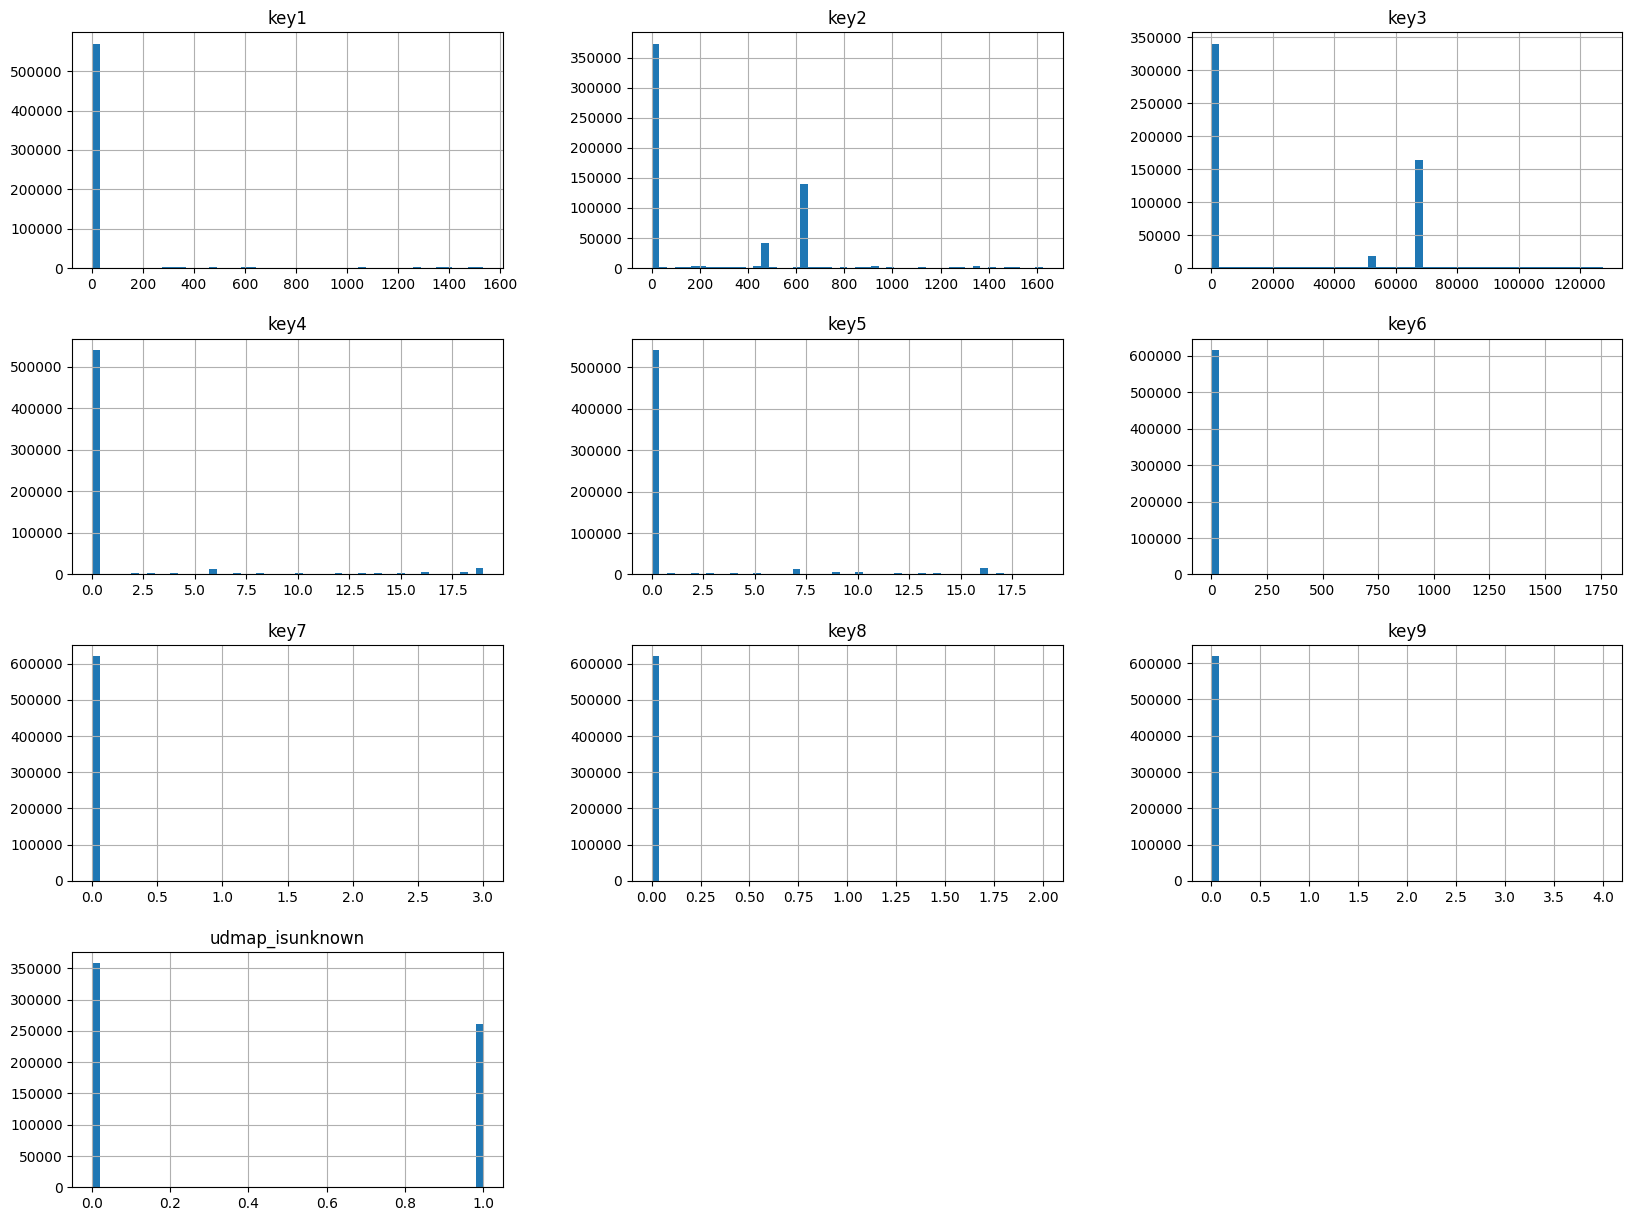

In [102]:
train_data.iloc[:,-10:].hist(bins=50,figsize=(20,15))
plt.show()